In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [6]:
for i in range(len(list(df["tenure"]))):
    if df["tenure"][i]== 0:
        print(i)
        df["TotalCharges"][i] = "0.00"


488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [8]:
for col in df.columns:
    df[col].replace({'Yes':1},inplace=True)
    df[col].replace({'No':0},inplace=True)
    df[col].replace({'Female':1},inplace=True)
    df[col].replace({'Male':0},inplace=True)
    df[col].replace({'No phone service':2},inplace=True)
    df[col].replace({'No internet service':2},inplace=True)
    df[col].replace({'DSL':1},inplace=True)
    df[col].replace({'Fiber optic':2},inplace=True)
    df[col].replace({'Month-to-month':0},inplace=True)
    df[col].replace({'One year':1},inplace=True)
    df[col].replace({'Two year':2},inplace=True)
    df[col].replace({'Electronic check':0},inplace=True)
    df[col].replace({'Mailed check':1},inplace=True)
    df[col].replace({'Bank transfer (automatic)':2},inplace=True)
    df[col].replace({'Credit card (automatic)':3},inplace=True)

In [9]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [2 0 1]
InternetService : [1 2 0]
OnlineSecurity : [0 1 2]
OnlineBackup : [1 0 2]
DeviceProtection : [0 1 2]
TechSupport : [0 1 2]
StreamingTV : [0 1 2]
StreamingMovies : [0 1 2]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [0 1 2 3]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


<AxesSubplot:>

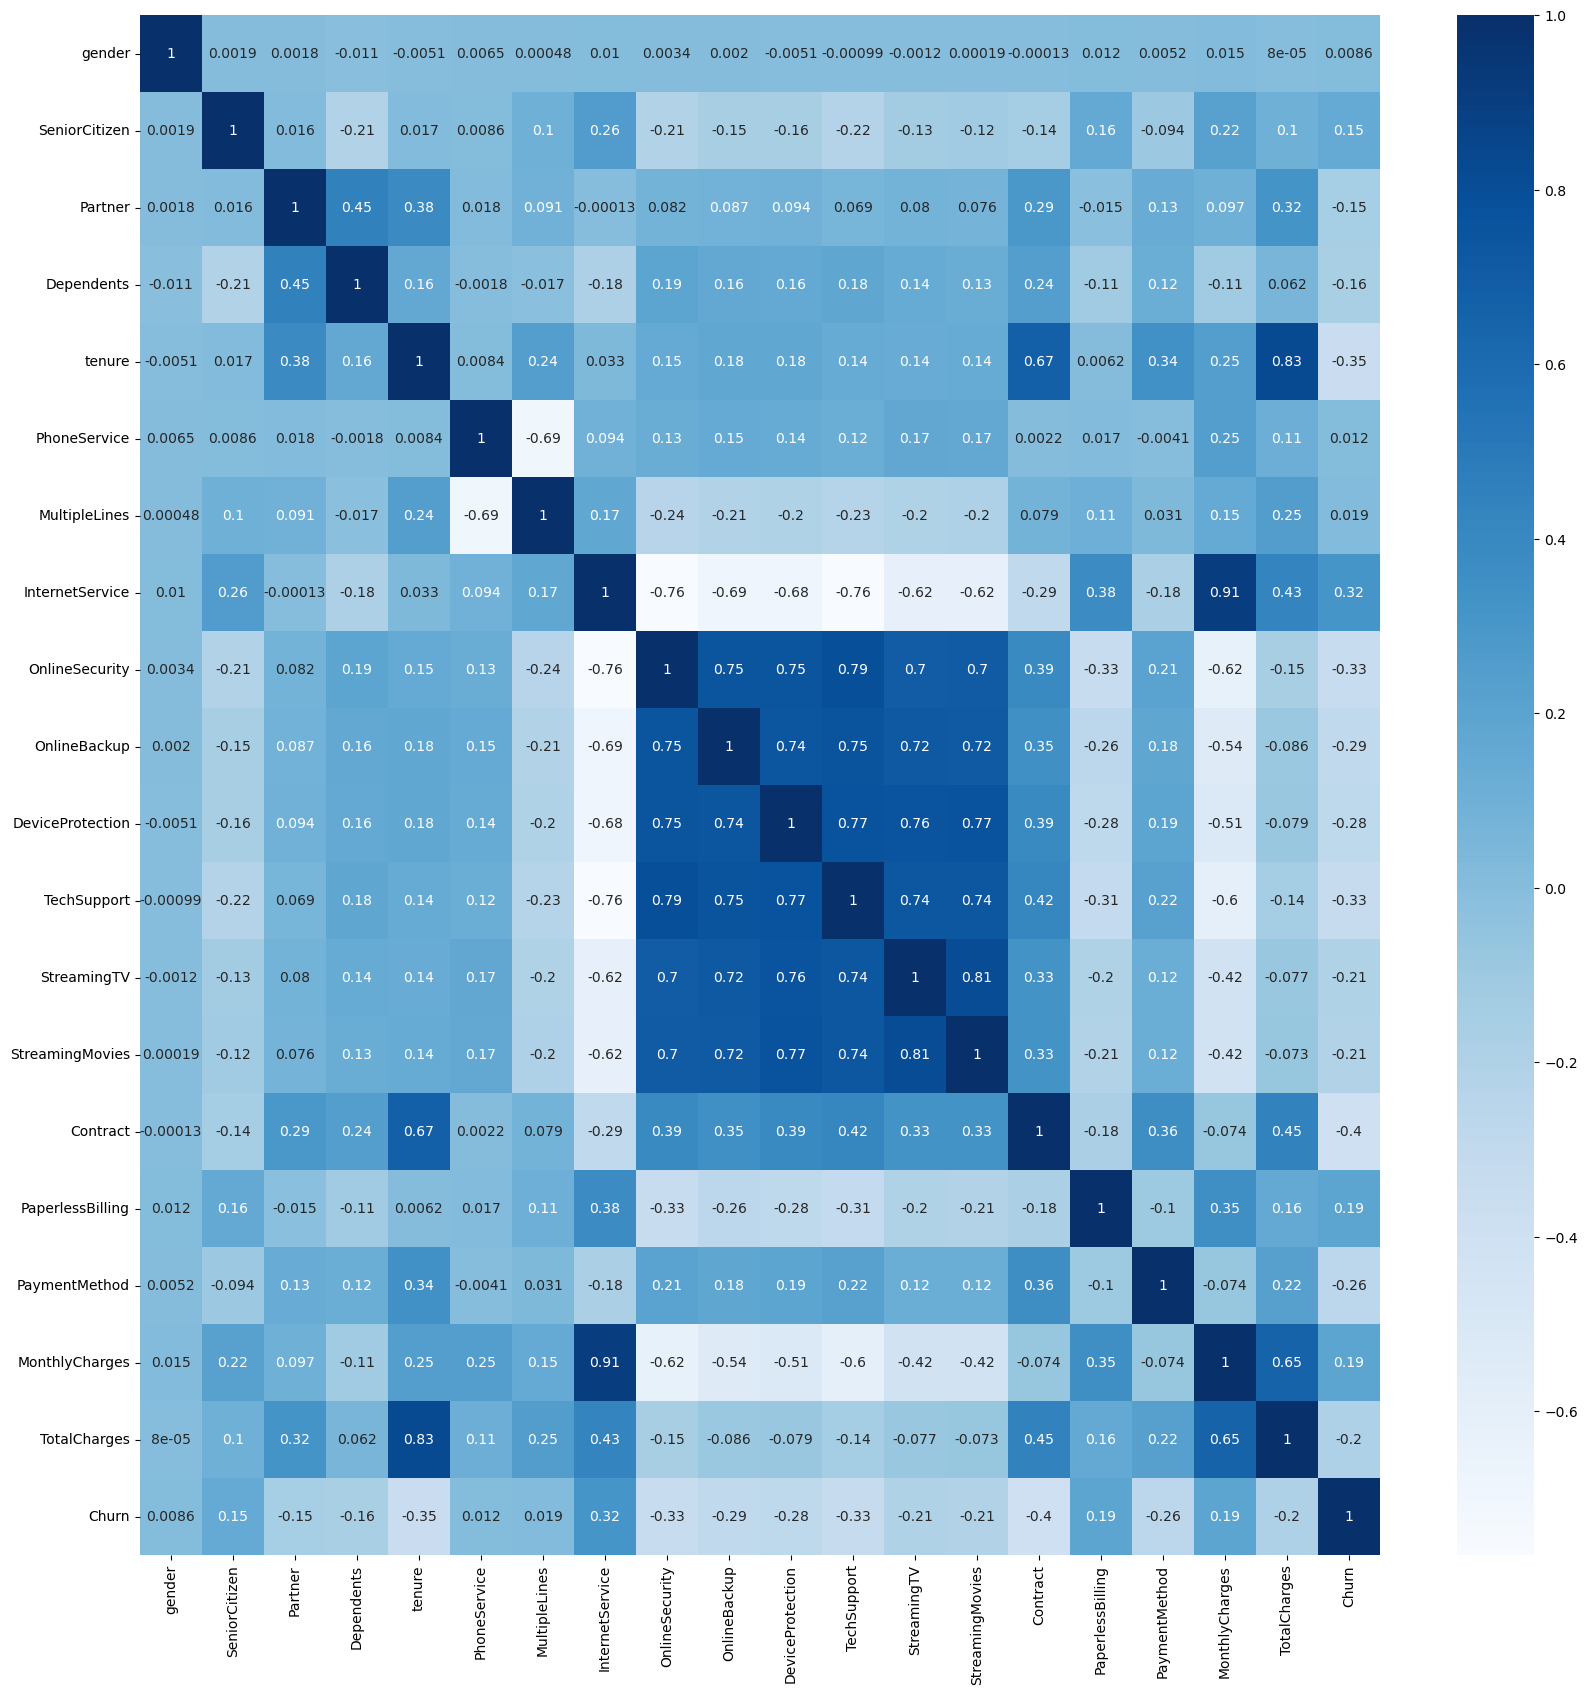

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

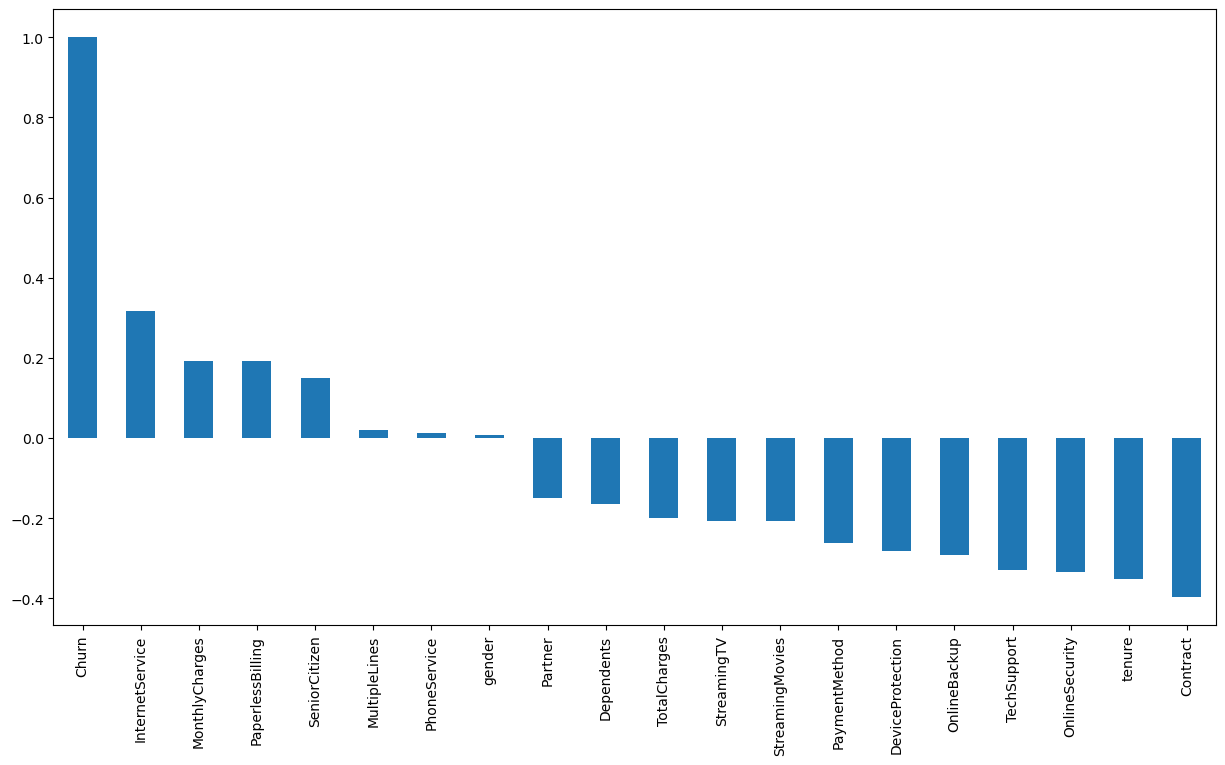

In [14]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [15]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,...,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2279.732178,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,...,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.794434,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.549988,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550049,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.599976,1.000000


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

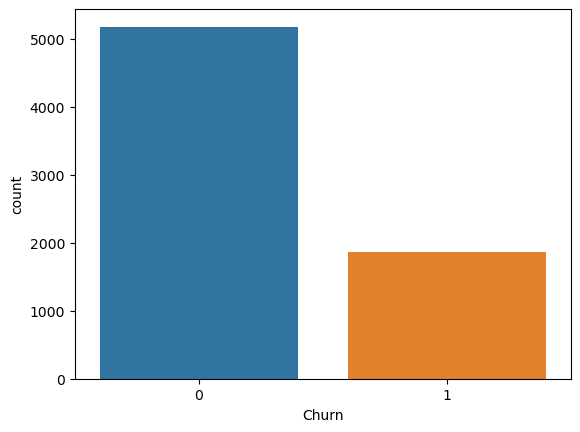

In [11]:
sns.countplot(x=df['Churn'])

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

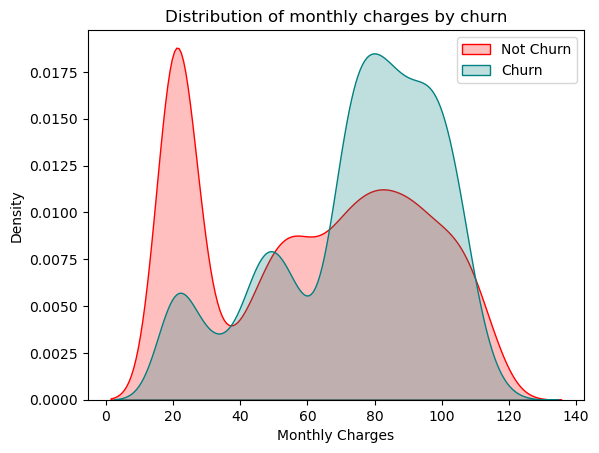

In [10]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Teal", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

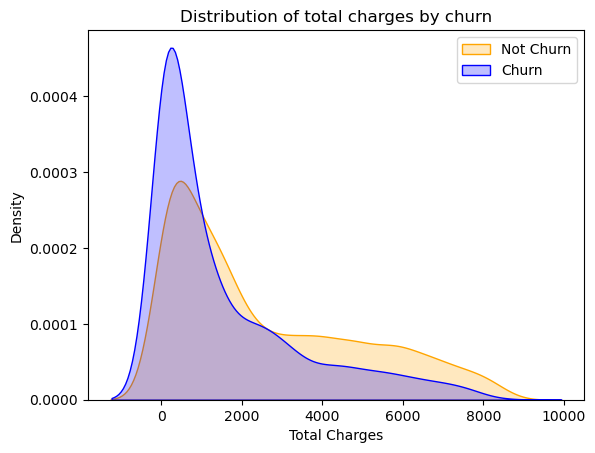

In [11]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Orange", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [11]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [14]:
customer = x_train["customerID"]
customertest = x_test["customerID"]

In [15]:
x_train = x_train.drop(['customerID'],axis=1)
x_test = x_test.drop(['customerID'],axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape

(5634, 19)

In [17]:
df_trans = df[['tenure', 'MonthlyCharges',
               'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans = pd.concat([df_trans, dummy_vars], axis=1)

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(12, input_dim=len(features), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=55, batch_size=80)

Epoch 1/55
71/71 [==============================] - 2s 1ms/step - loss: 38.6056 - accuracy: 0.7437
Epoch 2/55
71/71 [==============================] - 0s 1ms/step - loss: 16.0308 - accuracy: 0.7480
Epoch 3/55
71/71 [==============================] - 0s 1ms/step - loss: 5.3072 - accuracy: 0.7400
Epoch 4/55
71/71 [==============================] - 0s 1ms/step - loss: 0.9922 - accuracy: 0.6738
Epoch 5/55
71/71 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6555
Epoch 6/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.6846
Epoch 7/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.6997
Epoch 8/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7329
Epoch 9/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7575
Epoch 10/55
71/71 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7600
Epoch 11/55
71/71

45/45 [==============================] - 0s 1ms/step


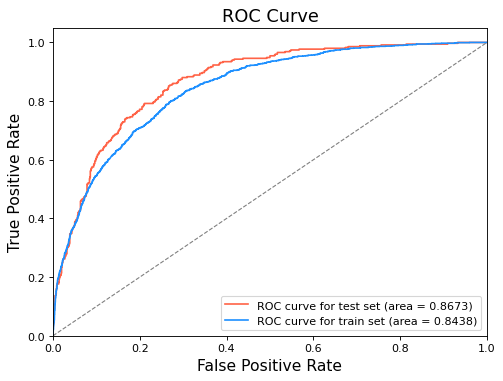

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [19]:
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8268275372604684
Accuracy of train set is 0.8061767838125665
Precision of test set is 0.668769716088328
Precision of train set is 0.6769102990033222
Recall of test set is 0.603988603988604
Recall of train set is 0.5368906455862977


In [23]:
#grid Search CV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(12, input_dim=len(features), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 82, 85],
    'epochs': [50, 55],
    'optimizer': ['adam']
}
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
64/64 [==============================] - 0s 1ms/step - loss: 100.2099 - accuracy: 0.7359
Epoch 2/50
64/64 [==============================] - 0s 1ms/step - loss: 20.8009 - accuracy: 0.6329
Epoch 3/50
64/64 [==============================] - 0s 1ms/step - loss: 1.5732 - accuracy: 0.5162
Epoch 4/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.6990
Epoch 5/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7091
Epoch 6/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7132
Epoch 7/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7262
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7243
Epoch 9/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7201
Epoch 10/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7304
Epoch 11/50
64/6

64/64 [==============================] - 0s 1ms/step - loss: 0.9437 - accuracy: 0.6775
Epoch 15/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7998 - accuracy: 0.6852
Epoch 16/50
64/64 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.6921
Epoch 17/50
64/64 [==============================] - 0s 975us/step - loss: 0.6476 - accuracy: 0.7114
Epoch 18/50
64/64 [==============================] - 0s 1ms/step - loss: 0.9704 - accuracy: 0.6884
Epoch 19/50
64/64 [==============================] - 0s 1ms/step - loss: 1.0189 - accuracy: 0.6728
Epoch 20/50
64/64 [==============================] - 0s 1ms/step - loss: 0.8483 - accuracy: 0.6793
Epoch 21/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7424 - accuracy: 0.6937
Epoch 22/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7432 - accuracy: 0.6992
Epoch 23/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.7053
Epoch 24/50
64/64 [=

64/64 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.7320
Epoch 28/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.7143
Epoch 29/50
64/64 [==============================] - 0s 983us/step - loss: 0.6012 - accuracy: 0.7255
Epoch 30/50
64/64 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7251
Epoch 31/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.7214
Epoch 32/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7152
Epoch 33/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.7172
Epoch 34/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7178
Epoch 35/50
64/64 [==============================] - 0s 782us/step - loss: 0.5925 - accuracy: 0.7247
Epoch 36/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7170
Epoch 37/50
64/64 

64/64 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7003
Epoch 41/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7001
Epoch 42/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.7050
Epoch 43/50
64/64 [==============================] - 0s 1ms/step - loss: 0.8226 - accuracy: 0.6762
Epoch 44/50
64/64 [==============================] - 0s 770us/step - loss: 0.7599 - accuracy: 0.6951
Epoch 45/50
64/64 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7074
Epoch 46/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.7028
Epoch 47/50
64/64 [==============================] - 0s 772us/step - loss: 0.6837 - accuracy: 0.6991
Epoch 48/50
64/64 [==============================] - 0s 1ms/step - loss: 0.7147 - accuracy: 0.6941
Epoch 49/50
64/64 [==============================] - 0s 965us/step - loss: 0.6044 - accuracy: 0.7200
Epoch 50/50
18/1

64/64 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.7347
Epoch 43/55
64/64 [==============================] - 0s 780us/step - loss: 0.5781 - accuracy: 0.7345
Epoch 44/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7345
Epoch 45/55
64/64 [==============================] - 0s 776us/step - loss: 0.5779 - accuracy: 0.7349
Epoch 46/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7345
Epoch 47/55
64/64 [==============================] - 0s 778us/step - loss: 0.5779 - accuracy: 0.7349
Epoch 48/55
64/64 [==============================] - 0s 970us/step - loss: 0.5780 - accuracy: 0.7347
Epoch 49/55
64/64 [==============================] - 0s 720us/step - loss: 0.5778 - accuracy: 0.7347
Epoch 50/55
64/64 [==============================] - 0s 964us/step - loss: 0.5779 - accuracy: 0.7353
Epoch 51/55
64/64 [==============================] - 0s 990us/step - loss: 0.5779 - accuracy: 0.7345
Epoch 52

64/64 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6934
Epoch 41/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.7107
Epoch 42/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.7012
Epoch 43/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.7095
Epoch 44/55
64/64 [==============================] - 0s 1ms/step - loss: 0.7528 - accuracy: 0.6880
Epoch 45/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.6987
Epoch 46/55
64/64 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.7038
Epoch 47/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7206
Epoch 48/55
64/64 [==============================] - 0s 1ms/step - loss: 0.7366 - accuracy: 0.7030
Epoch 49/55
64/64 [==============================] - 0s 1ms/step - loss: 0.7847 - accuracy: 0.6924
Epoch 50/55
64/64 [===

Epoch 12/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7308
Epoch 13/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7192
Epoch 14/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7285
Epoch 15/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7150
Epoch 16/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7216
Epoch 17/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7225
Epoch 18/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7087
Epoch 19/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7281
Epoch 20/55
64/64 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.7302
Epoch 21/55
64/64 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.7214
Epoch 22/5

Epoch 11/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7365
Epoch 12/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7365
Epoch 13/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7365
Epoch 14/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7363
Epoch 15/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7365
Epoch 16/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7365
Epoch 17/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7363
Epoch 18/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7363
Epoch 19/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7365
Epoch 20/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7363
Epoch 21/5

62/62 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.6856
Epoch 25/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.7026
Epoch 26/50
62/62 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.6834
Epoch 27/50
62/62 [==============================] - 0s 2ms/step - loss: 1.1699 - accuracy: 0.6714
Epoch 28/50
62/62 [==============================] - 0s 2ms/step - loss: 1.2202 - accuracy: 0.6734
Epoch 29/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7162
Epoch 30/50
62/62 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.6771
Epoch 31/50
62/62 [==============================] - 0s 2ms/step - loss: 1.1562 - accuracy: 0.6755
Epoch 32/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.6945
Epoch 33/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.7032
Epoch 34/50
62/62 [===

62/62 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7204
Epoch 38/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7198
Epoch 39/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.7127
Epoch 40/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7095
Epoch 41/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.7028
Epoch 42/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7040
Epoch 43/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7072
Epoch 44/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7007
Epoch 45/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7212
Epoch 46/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7403 - accuracy: 0.6969
Epoch 47/50
62/62 [===

Epoch 19/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7243
Epoch 20/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7164
Epoch 21/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7245
Epoch 22/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7154
Epoch 23/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7160
Epoch 24/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7214
Epoch 25/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7456 - accuracy: 0.6979
Epoch 26/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7095
Epoch 27/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7239
Epoch 28/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7302
Epoch 29/5

62/62 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7375
Epoch 28/55
62/62 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7375
Epoch 29/55
62/62 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.7373
Epoch 30/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7375
Epoch 31/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7375
Epoch 32/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7373
Epoch 33/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7375
Epoch 34/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7375
Epoch 35/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7375
Epoch 36/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7375
Epoch 37/55
62/62 [===

Epoch 26/55
62/62 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7105
Epoch 27/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7216
Epoch 28/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7194
Epoch 29/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6941
Epoch 30/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7077
Epoch 31/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.7123
Epoch 32/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7271
Epoch 33/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7261
Epoch 34/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7089
Epoch 35/55
62/62 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7070
Epoch 36/5

62/62 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7371
Epoch 25/55
62/62 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7371
Epoch 26/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7371
Epoch 27/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7371
Epoch 28/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7371
Epoch 29/55
62/62 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7371
Epoch 30/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7371
Epoch 31/55
62/62 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7371
Epoch 32/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7371
Epoch 33/55
62/62 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7371
Epoch 34/55
62/62 [===

Epoch 23/50
60/60 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7359
Epoch 24/50
60/60 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7359
Epoch 25/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7359
Epoch 26/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7359
Epoch 27/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7359
Epoch 28/50
60/60 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7359
Epoch 29/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7359
Epoch 30/50
60/60 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.7359
Epoch 31/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7359
Epoch 32/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7359
Epoch 33/5

60/60 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7124
Epoch 37/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7207
Epoch 38/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7099
Epoch 39/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7215
Epoch 40/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7085
Epoch 41/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.7057
Epoch 42/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7158
Epoch 43/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.7140
Epoch 44/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7144
Epoch 45/50
60/60 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.6992
Epoch 46/50
60/60 [===

Epoch 18/50
60/60 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.6951
Epoch 19/50
60/60 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.7042
Epoch 20/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6983
Epoch 21/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.7048
Epoch 22/50
60/60 [==============================] - 0s 2ms/step - loss: 0.9393 - accuracy: 0.6721
Epoch 23/50
60/60 [==============================] - 0s 2ms/step - loss: 1.3641 - accuracy: 0.6610
Epoch 24/50
60/60 [==============================] - 0s 1ms/step - loss: 1.2575 - accuracy: 0.6638
Epoch 25/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.7111
Epoch 26/50
60/60 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.6817
Epoch 27/50
60/60 [==============================] - 0s 2ms/step - loss: 0.8181 - accuracy: 0.6807
Epoch 28/5

Epoch 32/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7417
Epoch 33/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7419
Epoch 34/50
60/60 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7419
Epoch 35/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.7417
Epoch 36/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7419
Epoch 37/50
60/60 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7417
Epoch 38/50
60/60 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7417
Epoch 39/50
60/60 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7419
Epoch 40/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7421
Epoch 41/50
60/60 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7421
Epoch 42/5

60/60 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7039
Epoch 41/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7032
Epoch 42/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7065
Epoch 43/55
60/60 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7274
Epoch 44/55
60/60 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7150
Epoch 45/55
60/60 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.7193
Epoch 46/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7099
Epoch 47/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6996
Epoch 48/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.7081
Epoch 49/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7160
Epoch 50/55
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.9515 - accuracy: 0.6786
Epoch 39/55
60/60 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6991
Epoch 40/55
60/60 [==============================] - 0s 2ms/step - loss: 1.1250 - accuracy: 0.6579
Epoch 41/55
60/60 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.6728
Epoch 42/55
60/60 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.6932
Epoch 43/55
60/60 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.6837
Epoch 44/55
60/60 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.6746
Epoch 45/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.7003
Epoch 46/55
60/60 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.6764
Epoch 47/55
60/60 [==============================] - 0s 2ms/step - loss: 0.7885 - accuracy: 0.6719
Epoch 48/55
60/60 [===

Epoch 10/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7107
Epoch 11/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7139
Epoch 12/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7174
Epoch 13/55
60/60 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.7068
Epoch 14/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7275
Epoch 15/55
60/60 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.7087
Epoch 16/55
60/60 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.7243
Epoch 17/55
60/60 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7076
Epoch 18/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7273
Epoch 19/55
60/60 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7253
Epoch 20/5

Epoch 9/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.7326
Epoch 10/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7326
Epoch 11/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7326
Epoch 12/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7326
Epoch 13/55
60/60 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7326
Epoch 14/55
60/60 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7326
Epoch 15/55
60/60 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7326
Epoch 16/55
60/60 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.7326
Epoch 17/55
60/60 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7326
Epoch 18/55
60/60 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.7326
Epoch 19/55

In [24]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters

{'batch_size': 82, 'epochs': 55, 'optimizer': 'adam'}

In [25]:
best_accuracy

0.7355368907700641

In [174]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(12, input_dim=len(features), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=55, batch_size=82)

Epoch 1/55
69/69 [==============================] - 0s 1ms/step - loss: 125.2367 - accuracy: 0.2700
Epoch 2/55
69/69 [==============================] - 0s 1ms/step - loss: 7.0746 - accuracy: 0.6040
Epoch 3/55
69/69 [==============================] - 0s 1ms/step - loss: 0.9178 - accuracy: 0.6990
Epoch 4/55
69/69 [==============================] - 0s 988us/step - loss: 0.6921 - accuracy: 0.6876
Epoch 5/55
69/69 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7510
Epoch 6/55
69/69 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7693
Epoch 7/55
69/69 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7831
Epoch 8/55
69/69 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7856
Epoch 9/55
69/69 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7893
Epoch 10/55
69/69 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7904
Epoch 11/55
69/

45/45 [==============================] - 0s 962us/step


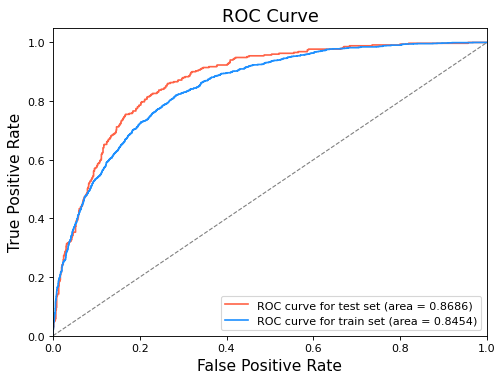

In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [176]:
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8225691980127751
Accuracy of train set is 0.7985445509407171
Precision of test set is 0.6446991404011462
Precision of train set is 0.6458492003046459
Recall of test set is 0.6410256410256411
Recall of train set is 0.5586297760210803


In [447]:
#Bayesian Search
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from skopt import BayesSearchCV
n_iter=5

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(12, input_dim=len(features), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 90],
    'epochs': [50, 60],
    'optimizer': ['adam']
}
bayes_search = BayesSearchCV(estimator = model, search_spaces = parameters, n_iter=n_iter, scoring = 'accuracy')
bayes_search = bayes_search.fit(X_train,y_train)

Epoch 1/57
52/52 [==============================] - 1s 1ms/step - loss: 7.5238 - accuracy: 0.5689
Epoch 2/57
52/52 [==============================] - 0s 1ms/step - loss: 0.7565 - accuracy: 0.5327
Epoch 3/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.7251
Epoch 4/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.7298
Epoch 5/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.7357
Epoch 6/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7357
Epoch 7/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.7360
Epoch 8/57
52/52 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.7362
Epoch 9/57
52/52 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7360
Epoch 10/57
52/52 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7360
Epoch 11/57
52/52 [

52/52 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7342
Epoch 52/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7333
Epoch 53/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7344
Epoch 54/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7320
Epoch 55/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7253
Epoch 56/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7326
Epoch 57/57
36/36 [==============================] - 0s 767us/step
Epoch 1/57
52/52 [==============================] - 0s 1ms/step - loss: 64.7131 - accuracy: 0.5050
Epoch 2/57
52/52 [==============================] - 0s 1ms/step - loss: 2.0432 - accuracy: 0.6845
Epoch 3/57
52/52 [==============================] - 0s 1ms/step - loss: 0.9056 - accuracy: 0.7040
Epoch 4/57
52/52 [==============================] - 0s 1

Epoch 19/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7378
Epoch 20/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7376
Epoch 21/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.7378
Epoch 22/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7378
Epoch 23/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7376
Epoch 24/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7376
Epoch 25/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7380
Epoch 26/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7378
Epoch 27/57
52/52 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7380
Epoch 28/57
52/52 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7380
Epoch 29/5

Epoch 16/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7002
Epoch 17/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7102
Epoch 18/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7058
Epoch 19/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7233
Epoch 20/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7049
Epoch 21/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7113
Epoch 22/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6989
Epoch 23/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7025
Epoch 24/55
56/56 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.6943
Epoch 25/55
56/56 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7127
Epoch 26/5

51/51 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7360
Epoch 15/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7360
Epoch 16/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7360
Epoch 17/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7360
Epoch 18/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7360
Epoch 19/59
51/51 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7360
Epoch 20/59
51/51 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7360
Epoch 21/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7360
Epoch 22/59
51/51 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7360
Epoch 23/59
51/51 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7360
Epoch 24/59
51/51 [===

36/36 [==============================] - 0s 447us/step
Epoch 1/59
51/51 [==============================] - 1s 1ms/step - loss: 2.5553 - accuracy: 0.6929
Epoch 2/59
51/51 [==============================] - 0s 937us/step - loss: 1.5985 - accuracy: 0.6898
Epoch 3/59
51/51 [==============================] - 0s 1ms/step - loss: 1.0343 - accuracy: 0.6869
Epoch 4/59
51/51 [==============================] - 0s 1ms/step - loss: 0.7408 - accuracy: 0.6663
Epoch 5/59
51/51 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.6667
Epoch 6/59
51/51 [==============================] - 0s 936us/step - loss: 0.7950 - accuracy: 0.6776
Epoch 7/59
51/51 [==============================] - 0s 1ms/step - loss: 0.7703 - accuracy: 0.6674
Epoch 8/59
51/51 [==============================] - 0s 890us/step - loss: 0.7824 - accuracy: 0.6774
Epoch 9/59
51/51 [==============================] - 0s 936us/step - loss: 0.7613 - accuracy: 0.6814
Epoch 10/59
51/51 [==============================] - 0s

53/53 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.6967
Epoch 47/55
53/53 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.6945
Epoch 48/55
53/53 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.7018
Epoch 49/55
53/53 [==============================] - 0s 1ms/step - loss: 0.7823 - accuracy: 0.6825
Epoch 50/55
53/53 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7009
Epoch 51/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7076
Epoch 52/55
53/53 [==============================] - 0s 2ms/step - loss: 0.7901 - accuracy: 0.6914
Epoch 53/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.7071
Epoch 54/55
53/53 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7142
Epoch 55/55
36/36 [==============================] - 0s 895us/step
Epoch 1/55
53/53 [==============================] - 1s

53/53 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7242
Epoch 45/55
53/53 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7293
Epoch 46/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7213
Epoch 47/55
53/53 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7333
Epoch 48/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7227
Epoch 49/55
53/53 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7349
Epoch 50/55
53/53 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7340
Epoch 51/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7164
Epoch 52/55
53/53 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.7355
Epoch 53/55
53/53 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7249
Epoch 54/55
53/53 [===

Epoch 16/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7320
Epoch 17/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7249
Epoch 18/54
54/54 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7138
Epoch 19/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7295
Epoch 20/54
54/54 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7189
Epoch 21/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7138
Epoch 22/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.7215
Epoch 23/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7304
Epoch 24/54
54/54 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7269
Epoch 25/54
54/54 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7260
Epoch 26/5

54/54 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7198
Epoch 18/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.7291
Epoch 19/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7187
Epoch 20/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7275
Epoch 21/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7138
Epoch 22/54
54/54 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7322
Epoch 23/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7144
Epoch 24/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.7056
Epoch 25/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7089
Epoch 26/54
54/54 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.7251
Epoch 27/54
54/54 [===

In [449]:
best_parameters = bayes_search.best_params_
best_accuracy = bayes_search.best_score_
best_parameters

OrderedDict([('batch_size', 84), ('epochs', 54), ('optimizer', 'adam')])

In [75]:
best_accuracy

0.7362435993008679

In [623]:
#new iteration
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.3,
                                                    random_state=18)

callback=EarlyStopping(monitor='loss',patience=20)

history = model.fit(X_train, Y_train, epochs=100, batch_size=70, callbacks=[callback])

Epoch 1/100
71/71 [==============================] - 0s 1ms/step - loss: 4.4067 - accuracy: 0.6848
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.7402
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.7422
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7576
Epoch 5/100
71/71 [==============================] - 0s 992us/step - loss: 0.5365 - accuracy: 0.7542
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7738
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7797
Epoch 8/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7826
Epoch 9/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7882
Epoch 10/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7799
Epoch 1

71/71 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8028
Epoch 83/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8020
Epoch 84/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7966
Epoch 85/100
71/71 [==============================] - 0s 1000us/step - loss: 0.4349 - accuracy: 0.7955
Epoch 86/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7978
Epoch 87/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7923
Epoch 88/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7935
Epoch 89/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8004
Epoch 90/100
71/71 [==============================] - 0s 958us/step - loss: 0.4308 - accuracy: 0.7986
Epoch 91/100
71/71 [==============================] - 0s 958us/step - loss: 0.4298 - accuracy: 0.7996
Epoch 

67/67 [==============================] - 0s 1ms/step


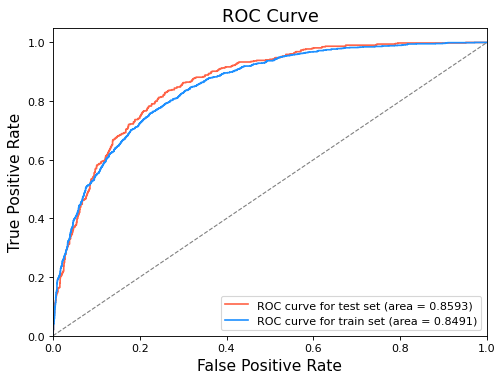

In [624]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [625]:
#new result
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8097491717936584
Accuracy of train set is 0.8038539553752535
Precision of test set is 0.6311787072243346
Precision of train set is 0.6573913043478261
Recall of test set is 0.6148148148148148
Recall of train set is 0.5688487584650113


In [616]:
#new iteration 2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(24, input_dim=len(features), activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=70, batch_size=82)

Epoch 1/70
69/69 [==============================] - 0s 1ms/step - loss: 207.8762 - accuracy: 0.4171
Epoch 2/70
69/69 [==============================] - 0s 1ms/step - loss: 13.3392 - accuracy: 0.6956
Epoch 3/70
69/69 [==============================] - 0s 1ms/step - loss: 7.7449 - accuracy: 0.6920
Epoch 4/70
69/69 [==============================] - 0s 1ms/step - loss: 5.3520 - accuracy: 0.7093
Epoch 5/70
69/69 [==============================] - 0s 1ms/step - loss: 5.1892 - accuracy: 0.7345
Epoch 6/70
69/69 [==============================] - 0s 1ms/step - loss: 5.0476 - accuracy: 0.7423
Epoch 7/70
69/69 [==============================] - 0s 1ms/step - loss: 4.8870 - accuracy: 0.7448
Epoch 8/70
69/69 [==============================] - 0s 1ms/step - loss: 4.6627 - accuracy: 0.7568
Epoch 9/70
69/69 [==============================] - 0s 1ms/step - loss: 4.2295 - accuracy: 0.7494
Epoch 10/70
69/69 [==============================] - 0s 1ms/step - loss: 2.4079 - accuracy: 0.7579
Epoch 11/70
69/6

45/45 [==============================] - 0s 1ms/step


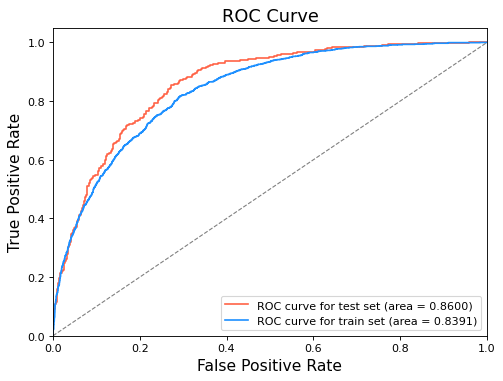

In [617]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [618]:
#!!!!
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.7991483321504613
Accuracy of train set is 0.7836350727724529
Precision of test set is 0.5776255707762558
Precision of train set is 0.5891472868217055
Recall of test set is 0.7207977207977208
Recall of train set is 0.6508563899868248


In [619]:
#Bayesian Search 2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from skopt import BayesSearchCV
n_iter=10

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(24, input_dim=len(features), activation='relu'))
    model.add(Dropout(rate=0.01))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 90],
    'epochs': [70, 80],
    'optimizer': ['adam']
}
bayes_search = BayesSearchCV(estimator = model, search_spaces = parameters, n_iter=n_iter, scoring = 'accuracy')
bayes_search = bayes_search.fit(X_train,y_train)

Epoch 1/77
52/52 [==============================] - 0s 1ms/step - loss: 10.9860 - accuracy: 0.3563
Epoch 2/77
52/52 [==============================] - 0s 1ms/step - loss: 1.0349 - accuracy: 0.6852
Epoch 3/77
52/52 [==============================] - 0s 846us/step - loss: 0.8955 - accuracy: 0.7149
Epoch 4/77
52/52 [==============================] - 0s 931us/step - loss: 0.7553 - accuracy: 0.7249
Epoch 5/77
52/52 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.7264
Epoch 6/77
52/52 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7293
Epoch 7/77
52/52 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.7298
Epoch 8/77
52/52 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7300
Epoch 9/77
52/52 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7322
Epoch 10/77
52/52 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7309
Epoch 11/77
52

52/52 [==============================] - 0s 963us/step - loss: 1.9026 - accuracy: 0.6916
Epoch 7/77
52/52 [==============================] - 0s 1ms/step - loss: 1.7887 - accuracy: 0.6985
Epoch 8/77
52/52 [==============================] - 0s 1ms/step - loss: 1.7870 - accuracy: 0.6747
Epoch 9/77
52/52 [==============================] - 0s 873us/step - loss: 1.4876 - accuracy: 0.6980
Epoch 10/77
52/52 [==============================] - 0s 1ms/step - loss: 1.3946 - accuracy: 0.7040
Epoch 11/77
52/52 [==============================] - 0s 2ms/step - loss: 1.3909 - accuracy: 0.6911
Epoch 12/77
52/52 [==============================] - 0s 2ms/step - loss: 1.4654 - accuracy: 0.7138
Epoch 13/77
52/52 [==============================] - 0s 1ms/step - loss: 1.4724 - accuracy: 0.7016
Epoch 14/77
52/52 [==============================] - 0s 1ms/step - loss: 1.4289 - accuracy: 0.7067
Epoch 15/77
52/52 [==============================] - 0s 1ms/step - loss: 1.2844 - accuracy: 0.7142
Epoch 16/77
52/52 [==

52/52 [==============================] - 0s 1ms/step - loss: 2.9568 - accuracy: 0.6801
Epoch 12/77
52/52 [==============================] - 0s 950us/step - loss: 3.5526 - accuracy: 0.6818
Epoch 13/77
52/52 [==============================] - 0s 1ms/step - loss: 2.8980 - accuracy: 0.6592
Epoch 14/77
52/52 [==============================] - 0s 1ms/step - loss: 3.1408 - accuracy: 0.6683
Epoch 15/77
52/52 [==============================] - 0s 1ms/step - loss: 3.1047 - accuracy: 0.6812
Epoch 16/77
52/52 [==============================] - 0s 1ms/step - loss: 2.4925 - accuracy: 0.6794
Epoch 17/77
52/52 [==============================] - 0s 1ms/step - loss: 2.8634 - accuracy: 0.6860
Epoch 18/77
52/52 [==============================] - 0s 919us/step - loss: 2.8853 - accuracy: 0.6470
Epoch 19/77
52/52 [==============================] - 0s 1ms/step - loss: 2.5548 - accuracy: 0.6685
Epoch 20/77
52/52 [==============================] - 0s 1ms/step - loss: 2.6889 - accuracy: 0.6825
Epoch 21/77
52/52 

52/52 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.6736
Epoch 17/77
52/52 [==============================] - 0s 2ms/step - loss: 1.9324 - accuracy: 0.6596
Epoch 18/77
52/52 [==============================] - 0s 2ms/step - loss: 1.0935 - accuracy: 0.7016
Epoch 19/77
52/52 [==============================] - 0s 2ms/step - loss: 1.0057 - accuracy: 0.6996
Epoch 20/77
52/52 [==============================] - 0s 2ms/step - loss: 0.9124 - accuracy: 0.6940
Epoch 21/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.7116
Epoch 22/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.7065
Epoch 23/77
52/52 [==============================] - 0s 2ms/step - loss: 0.9192 - accuracy: 0.7000
Epoch 24/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8752 - accuracy: 0.6971
Epoch 25/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.7014
Epoch 26/77
52/52 [===

52/52 [==============================] - 0s 2ms/step - loss: 0.8964 - accuracy: 0.6961
Epoch 22/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.6888
Epoch 23/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8060 - accuracy: 0.7103
Epoch 24/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.6950
Epoch 25/77
52/52 [==============================] - 0s 2ms/step - loss: 0.9317 - accuracy: 0.6792
Epoch 26/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.7067
Epoch 27/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.6981
Epoch 28/77
52/52 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.7090
Epoch 29/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.7176
Epoch 30/77
52/52 [==============================] - 0s 2ms/step - loss: 0.8951 - accuracy: 0.6912
Epoch 31/77
52/52 [===

57/57 [==============================] - 0s 2ms/step - loss: 2.3874 - accuracy: 0.6716
Epoch 27/72
57/57 [==============================] - 0s 2ms/step - loss: 2.0199 - accuracy: 0.6865
Epoch 28/72
57/57 [==============================] - 0s 2ms/step - loss: 2.4853 - accuracy: 0.6763
Epoch 29/72
57/57 [==============================] - 0s 2ms/step - loss: 2.0844 - accuracy: 0.6854
Epoch 30/72
57/57 [==============================] - 0s 2ms/step - loss: 2.1220 - accuracy: 0.7005
Epoch 31/72
57/57 [==============================] - 0s 2ms/step - loss: 2.2909 - accuracy: 0.6741
Epoch 32/72
57/57 [==============================] - 0s 2ms/step - loss: 2.0222 - accuracy: 0.6827
Epoch 33/72
57/57 [==============================] - 0s 2ms/step - loss: 1.7512 - accuracy: 0.6885
Epoch 34/72
57/57 [==============================] - 0s 2ms/step - loss: 2.1877 - accuracy: 0.6792
Epoch 35/72
57/57 [==============================] - 0s 2ms/step - loss: 1.8710 - accuracy: 0.6849
Epoch 36/72
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 1.4552 - accuracy: 0.6661
Epoch 37/72
57/57 [==============================] - 0s 2ms/step - loss: 1.1748 - accuracy: 0.6767
Epoch 38/72
57/57 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.6803
Epoch 39/72
57/57 [==============================] - 0s 2ms/step - loss: 1.1816 - accuracy: 0.6765
Epoch 40/72
57/57 [==============================] - 0s 2ms/step - loss: 1.2162 - accuracy: 0.6703
Epoch 41/72
57/57 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.6958
Epoch 42/72
57/57 [==============================] - 0s 2ms/step - loss: 0.9645 - accuracy: 0.6856
Epoch 43/72
57/57 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.6727
Epoch 44/72
57/57 [==============================] - 0s 2ms/step - loss: 1.3047 - accuracy: 0.6767
Epoch 45/72
57/57 [==============================] - 0s 2ms/step - loss: 1.0790 - accuracy: 0.6847
Epoch 46/72
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.7093
Epoch 47/72
57/57 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.7058
Epoch 48/72
57/57 [==============================] - 0s 2ms/step - loss: 0.9070 - accuracy: 0.6761
Epoch 49/72
57/57 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.7031
Epoch 50/72
57/57 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.6971
Epoch 51/72
57/57 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.6945
Epoch 52/72
57/57 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.6812
Epoch 53/72
57/57 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.7109
Epoch 54/72
57/57 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.6880
Epoch 55/72
57/57 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.7011
Epoch 56/72
57/57 [===

57/57 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.7235
Epoch 57/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7313
Epoch 58/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7351
Epoch 59/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7298
Epoch 60/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7315
Epoch 61/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.7213
Epoch 62/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7309
Epoch 63/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7253
Epoch 64/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7271
Epoch 65/72
57/57 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7304
Epoch 66/72
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 0.9716 - accuracy: 0.7127
Epoch 67/72
57/57 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.7087
Epoch 68/72
57/57 [==============================] - 0s 2ms/step - loss: 1.1263 - accuracy: 0.6992
Epoch 69/72
57/57 [==============================] - 0s 2ms/step - loss: 1.0932 - accuracy: 0.6988
Epoch 70/72
57/57 [==============================] - 0s 2ms/step - loss: 1.1059 - accuracy: 0.6970
Epoch 71/72
57/57 [==============================] - 0s 3ms/step - loss: 1.1111 - accuracy: 0.7072
Epoch 72/72
36/36 [==============================] - 0s 2ms/step
Epoch 1/70
53/53 [==============================] - 1s 2ms/step - loss: 132.1065 - accuracy: 0.4324
Epoch 2/70
53/53 [==============================] - 0s 2ms/step - loss: 8.2331 - accuracy: 0.6490
Epoch 3/70
53/53 [==============================] - 0s 2ms/step - loss: 5.0586 - accuracy: 0.6483
Epoch 4/70
53/53 [==============================] - 0s 2m

KeyboardInterrupt: 

In [34]:
best_parameters = bayes_search.best_params_
best_accuracy = bayes_search.best_score_
best_parameters

OrderedDict([('batch_size', 86), ('epochs', 75), ('optimizer', 'adam')])

In [35]:
best_accuracy

0.7358886747223409

In [620]:
#new iteration 3
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(24, input_dim=len(features), activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.1,
                                                    random_state=18)

callback=EarlyStopping(monitor='loss',patience=5)

history = model.fit(X_train, Y_train, epochs=100, batch_size=80,callbacks=[callback])

Epoch 1/100
80/80 [==============================] - 0s 1ms/step - loss: 38.7143 - accuracy: 0.6379
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 6.2399 - accuracy: 0.6311
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 6.2337 - accuracy: 0.7149
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 5.0221 - accuracy: 0.7258
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 4.7708 - accuracy: 0.7352
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 4.9989 - accuracy: 0.7270
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 4.3199 - accuracy: 0.7293
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 3.8361 - accuracy: 0.7357
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 3.5386 - accuracy: 0.7442
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 3.3942 - accuracy: 0.7449
Epoch 11

23/23 [==============================] - 0s 2ms/step


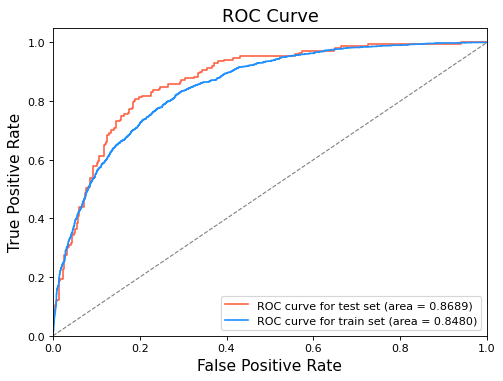

In [621]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [622]:
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8283687943262411
Accuracy of train set is 0.8067213632060587
Precision of test set is 0.668918918918919
Precision of train set is 0.6747967479674797
Recall of test set is 0.5789473684210527
Recall of train set is 0.5376914016489989


In [360]:
#grid Search CV with early stopping and dropout
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(24, input_dim=len(features), activation='relu'))
    model.add(Dropout(rate=0.01))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = build_classifier)

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)
parameters = {
    'batch_size': [80, 85, 90, 95, 100],
    'epochs': [70, 75, 80],
    'optimizer': ['adam']
}
callback=EarlyStopping(monitor='loss',patience=10)
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train,callbacks=[callback])

Epoch 1/70
64/64 [==============================] - 1s 3ms/step - loss: 42.3731 - accuracy: 0.6897
Epoch 2/70
64/64 [==============================] - 0s 2ms/step - loss: 2.3593 - accuracy: 0.6923
Epoch 3/70
64/64 [==============================] - 0s 1ms/step - loss: 2.1700 - accuracy: 0.6888
Epoch 4/70
64/64 [==============================] - 0s 2ms/step - loss: 1.8775 - accuracy: 0.6781
Epoch 5/70
64/64 [==============================] - 0s 2ms/step - loss: 2.1553 - accuracy: 0.6819
Epoch 6/70
64/64 [==============================] - 0s 2ms/step - loss: 1.5303 - accuracy: 0.6864
Epoch 7/70
64/64 [==============================] - 0s 2ms/step - loss: 1.4458 - accuracy: 0.7010
Epoch 8/70
64/64 [==============================] - 0s 2ms/step - loss: 1.8474 - accuracy: 0.6822
Epoch 9/70
64/64 [==============================] - 0s 2ms/step - loss: 1.7241 - accuracy: 0.6671
Epoch 10/70
64/64 [==============================] - 0s 2ms/step - loss: 1.5682 - accuracy: 0.6870
Epoch 11/70
64/64 

64/64 [==============================] - 0s 2ms/step - loss: 1.4314 - accuracy: 0.6978
Epoch 54/70
64/64 [==============================] - 0s 1ms/step - loss: 1.9278 - accuracy: 0.6716
Epoch 55/70
64/64 [==============================] - 0s 2ms/step - loss: 1.9694 - accuracy: 0.6523
Epoch 56/70
64/64 [==============================] - 0s 2ms/step - loss: 1.6353 - accuracy: 0.6600
Epoch 57/70
64/64 [==============================] - 0s 1ms/step - loss: 1.4208 - accuracy: 0.6716
Epoch 58/70
64/64 [==============================] - 0s 2ms/step - loss: 1.4478 - accuracy: 0.6675
Epoch 59/70
64/64 [==============================] - 0s 2ms/step - loss: 1.9010 - accuracy: 0.6643
Epoch 60/70
64/64 [==============================] - 0s 2ms/step - loss: 1.7043 - accuracy: 0.6604
Epoch 61/70
18/18 [==============================] - 0s 817us/step
Epoch 1/70
64/64 [==============================] - 1s 1ms/step - loss: 42.3449 - accuracy: 0.5288
Epoch 2/70
64/64 [==============================] - 0s

Epoch 33/70
64/64 [==============================] - 0s 1ms/step - loss: 0.8095 - accuracy: 0.7136
Epoch 34/70
64/64 [==============================] - 0s 1ms/step - loss: 0.8803 - accuracy: 0.7053
Epoch 35/70
64/64 [==============================] - 0s 1ms/step - loss: 0.8427 - accuracy: 0.7099
Epoch 36/70
64/64 [==============================] - 0s 2ms/step - loss: 0.8722 - accuracy: 0.7039
Epoch 37/70
64/64 [==============================] - 0s 2ms/step - loss: 0.8148 - accuracy: 0.7101
Epoch 38/70
64/64 [==============================] - 0s 1ms/step - loss: 0.8036 - accuracy: 0.7158
Epoch 39/70
64/64 [==============================] - 0s 1ms/step - loss: 0.8077 - accuracy: 0.6972
Epoch 40/70
64/64 [==============================] - 0s 1ms/step - loss: 0.7654 - accuracy: 0.7168
Epoch 41/70
64/64 [==============================] - 0s 1ms/step - loss: 0.7293 - accuracy: 0.7057
Epoch 42/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.7262
Epoch 43/7

64/64 [==============================] - 0s 2ms/step - loss: 0.8249 - accuracy: 0.6876
Epoch 46/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.7028
Epoch 47/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.7010
Epoch 48/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.6981
Epoch 49/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.7133
Epoch 50/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7166
Epoch 51/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.7091
Epoch 52/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7154
Epoch 53/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.7003
Epoch 54/70
64/64 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7154
Epoch 55/70
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 1.2315 - accuracy: 0.6977
Epoch 8/70
64/64 [==============================] - 0s 2ms/step - loss: 1.2945 - accuracy: 0.7008
Epoch 9/70
64/64 [==============================] - 0s 2ms/step - loss: 1.2795 - accuracy: 0.7064
Epoch 10/70
64/64 [==============================] - 0s 2ms/step - loss: 1.1134 - accuracy: 0.7014
Epoch 11/70
64/64 [==============================] - 0s 1ms/step - loss: 1.1531 - accuracy: 0.7105
Epoch 12/70
64/64 [==============================] - 0s 2ms/step - loss: 1.0551 - accuracy: 0.7121
Epoch 13/70
64/64 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.6876
Epoch 14/70
64/64 [==============================] - 0s 1ms/step - loss: 1.0001 - accuracy: 0.7137
Epoch 15/70
64/64 [==============================] - 0s 2ms/step - loss: 1.0845 - accuracy: 0.7030
Epoch 16/70
64/64 [==============================] - 0s 1ms/step - loss: 1.0576 - accuracy: 0.7007
Epoch 17/70
64/64 [=====

64/64 [==============================] - 0s 2ms/step - loss: 2.0355 - accuracy: 0.6799
Epoch 20/70
64/64 [==============================] - 0s 2ms/step - loss: 1.9158 - accuracy: 0.6975
Epoch 21/70
64/64 [==============================] - 0s 2ms/step - loss: 1.6188 - accuracy: 0.6880
Epoch 22/70
64/64 [==============================] - 0s 2ms/step - loss: 1.9224 - accuracy: 0.6876
Epoch 23/70
64/64 [==============================] - 0s 2ms/step - loss: 1.5691 - accuracy: 0.6939
Epoch 24/70
64/64 [==============================] - 0s 1ms/step - loss: 1.4610 - accuracy: 0.7054
Epoch 25/70
64/64 [==============================] - 0s 1ms/step - loss: 1.5811 - accuracy: 0.7083
Epoch 26/70
64/64 [==============================] - 0s 1ms/step - loss: 1.6054 - accuracy: 0.7014
Epoch 27/70
64/64 [==============================] - 0s 2ms/step - loss: 1.3135 - accuracy: 0.7024
Epoch 28/70
64/64 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.7091
Epoch 29/70
64/64 [===

64/64 [==============================] - 0s 1ms/step - loss: 0.7184 - accuracy: 0.7198
Epoch 6/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.7251
Epoch 7/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.7194
Epoch 8/70
64/64 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.7210
Epoch 9/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.7137
Epoch 10/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.7233
Epoch 11/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7208
Epoch 12/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7210
Epoch 13/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7223
Epoch 14/70
64/64 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.7178
Epoch 15/70
64/64 [=======

64/64 [==============================] - 0s 2ms/step - loss: 1.8619 - accuracy: 0.6809
Epoch 5/75
64/64 [==============================] - 0s 2ms/step - loss: 1.5577 - accuracy: 0.6878
Epoch 6/75
64/64 [==============================] - 0s 2ms/step - loss: 1.2396 - accuracy: 0.6722
Epoch 7/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9863 - accuracy: 0.6911
Epoch 8/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.6866
Epoch 9/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.7022
Epoch 10/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9383 - accuracy: 0.6834
Epoch 11/75
64/64 [==============================] - 0s 1ms/step - loss: 0.9769 - accuracy: 0.6817
Epoch 12/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9766 - accuracy: 0.6836
Epoch 13/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9221 - accuracy: 0.6854
Epoch 14/75
64/64 [========

Epoch 4/75
64/64 [==============================] - 0s 2ms/step - loss: 2.2754 - accuracy: 0.6775
Epoch 5/75
64/64 [==============================] - 0s 1ms/step - loss: 2.4983 - accuracy: 0.6755
Epoch 6/75
64/64 [==============================] - 0s 2ms/step - loss: 1.8960 - accuracy: 0.6939
Epoch 7/75
64/64 [==============================] - 0s 2ms/step - loss: 1.5436 - accuracy: 0.6744
Epoch 8/75
64/64 [==============================] - 0s 2ms/step - loss: 1.6440 - accuracy: 0.7041
Epoch 9/75
64/64 [==============================] - 0s 1ms/step - loss: 1.5830 - accuracy: 0.7110
Epoch 10/75
64/64 [==============================] - 0s 1ms/step - loss: 1.5082 - accuracy: 0.7065
Epoch 11/75
64/64 [==============================] - 0s 1ms/step - loss: 1.4576 - accuracy: 0.7164
Epoch 12/75
64/64 [==============================] - 0s 2ms/step - loss: 1.1876 - accuracy: 0.7227
Epoch 13/75
64/64 [==============================] - 0s 2ms/step - loss: 1.0895 - accuracy: 0.7089
Epoch 14/75
64/6

64/64 [==============================] - 0s 1ms/step - loss: 1.7479 - accuracy: 0.6780
Epoch 9/75
64/64 [==============================] - 0s 1ms/step - loss: 1.5221 - accuracy: 0.6750
Epoch 10/75
64/64 [==============================] - 0s 2ms/step - loss: 1.7185 - accuracy: 0.6772
Epoch 11/75
64/64 [==============================] - 0s 1ms/step - loss: 1.0145 - accuracy: 0.7034
Epoch 12/75
64/64 [==============================] - 0s 1ms/step - loss: 1.1432 - accuracy: 0.6835
Epoch 13/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.7040
Epoch 14/75
64/64 [==============================] - 0s 1ms/step - loss: 0.8739 - accuracy: 0.7107
Epoch 15/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9538 - accuracy: 0.7054
Epoch 16/75
64/64 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.7117
Epoch 17/75
64/64 [==============================] - 0s 1ms/step - loss: 0.8796 - accuracy: 0.6993
Epoch 18/75
64/64 [====

Epoch 25/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.7079
Epoch 26/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9162 - accuracy: 0.7014
Epoch 27/75
64/64 [==============================] - 0s 1ms/step - loss: 1.0528 - accuracy: 0.6910
Epoch 28/75
64/64 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.6876
Epoch 29/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8945 - accuracy: 0.6855
Epoch 30/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.7018
Epoch 31/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8958 - accuracy: 0.6912
Epoch 32/75
64/64 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7014
Epoch 33/75
64/64 [==============================] - 0s 1ms/step - loss: 0.8560 - accuracy: 0.6874
Epoch 34/75
64/64 [==============================] - 0s 1ms/step - loss: 0.9456 - accuracy: 0.6920
Epoch 35/7

64/64 [==============================] - 0s 2ms/step - loss: 3.4786 - accuracy: 0.6443
Epoch 13/75
64/64 [==============================] - 0s 1ms/step - loss: 3.6710 - accuracy: 0.6715
Epoch 14/75
64/64 [==============================] - 0s 2ms/step - loss: 3.3053 - accuracy: 0.6687
Epoch 15/75
64/64 [==============================] - 0s 1ms/step - loss: 3.1226 - accuracy: 0.6661
Epoch 16/75
64/64 [==============================] - 0s 2ms/step - loss: 3.2265 - accuracy: 0.6809
Epoch 17/75
64/64 [==============================] - 0s 1ms/step - loss: 2.8727 - accuracy: 0.6861
Epoch 18/75
64/64 [==============================] - 0s 1ms/step - loss: 2.5717 - accuracy: 0.6969
Epoch 19/75
64/64 [==============================] - 0s 1ms/step - loss: 2.4941 - accuracy: 0.6813
Epoch 20/75
64/64 [==============================] - 0s 1ms/step - loss: 2.3984 - accuracy: 0.6872
Epoch 21/75
64/64 [==============================] - 0s 2ms/step - loss: 2.3678 - accuracy: 0.6861
Epoch 22/75
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.7087
Epoch 20/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.7124
Epoch 21/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.7138
Epoch 22/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.7176
Epoch 23/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7081
Epoch 24/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7203
Epoch 25/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7103
Epoch 26/80
64/64 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.7166
Epoch 27/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.6988
Epoch 28/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7284
Epoch 29/80
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 1.1104 - accuracy: 0.7036
Epoch 29/80
64/64 [==============================] - 0s 2ms/step - loss: 1.2165 - accuracy: 0.6957
Epoch 30/80
64/64 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.7008
Epoch 31/80
64/64 [==============================] - 0s 1ms/step - loss: 1.1375 - accuracy: 0.6901
Epoch 32/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0299 - accuracy: 0.6913
Epoch 33/80
64/64 [==============================] - 0s 1ms/step - loss: 1.1779 - accuracy: 0.6761
Epoch 34/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.6850
Epoch 35/80
64/64 [==============================] - 0s 2ms/step - loss: 0.9880 - accuracy: 0.6844
Epoch 36/80
64/64 [==============================] - 0s 2ms/step - loss: 0.9887 - accuracy: 0.6822
Epoch 37/80
64/64 [==============================] - 0s 1ms/step - loss: 0.8432 - accuracy: 0.7081
Epoch 38/80
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 0.9715 - accuracy: 0.7049
Epoch 31/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0656 - accuracy: 0.6884
Epoch 32/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.6905
Epoch 33/80
64/64 [==============================] - 0s 2ms/step - loss: 1.1281 - accuracy: 0.6856
Epoch 34/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0104 - accuracy: 0.6988
Epoch 35/80
64/64 [==============================] - 0s 1ms/step - loss: 1.0699 - accuracy: 0.6990
Epoch 36/80
64/64 [==============================] - 0s 2ms/step - loss: 1.1315 - accuracy: 0.6921
Epoch 37/80
64/64 [==============================] - 0s 2ms/step - loss: 0.9522 - accuracy: 0.7006
Epoch 38/80
64/64 [==============================] - 0s 1ms/step - loss: 0.9987 - accuracy: 0.7018
Epoch 39/80
64/64 [==============================] - 0s 2ms/step - loss: 0.9184 - accuracy: 0.7065
Epoch 40/80
64/64 [===

64/64 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.7337
Epoch 33/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7235
Epoch 34/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7243
Epoch 35/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7337
Epoch 36/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.7176
Epoch 37/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7335
Epoch 38/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7371
Epoch 39/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7361
Epoch 40/80
64/64 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.7276
Epoch 41/80
64/64 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.7347
Epoch 42/80
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 1.4124 - accuracy: 0.7150
Epoch 16/80
64/64 [==============================] - 0s 1ms/step - loss: 1.2239 - accuracy: 0.7121
Epoch 17/80
64/64 [==============================] - 0s 2ms/step - loss: 1.2817 - accuracy: 0.7141
Epoch 18/80
64/64 [==============================] - 0s 2ms/step - loss: 1.1924 - accuracy: 0.7158
Epoch 19/80
64/64 [==============================] - 0s 2ms/step - loss: 1.1963 - accuracy: 0.7117
Epoch 20/80
64/64 [==============================] - 0s 1ms/step - loss: 0.9980 - accuracy: 0.7137
Epoch 21/80
64/64 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.7081
Epoch 22/80
64/64 [==============================] - 0s 2ms/step - loss: 1.2093 - accuracy: 0.7070
Epoch 23/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0015 - accuracy: 0.7083
Epoch 24/80
64/64 [==============================] - 0s 2ms/step - loss: 1.0913 - accuracy: 0.7180
Epoch 25/80
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 0.7684 - accuracy: 0.7119
Epoch 31/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.7168
Epoch 32/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.7145
Epoch 33/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.7249
Epoch 34/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.7182
Epoch 35/80
64/64 [==============================] - 0s 1ms/step - loss: 0.7895 - accuracy: 0.7077
Epoch 36/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.7221
Epoch 37/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.7192
Epoch 38/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.7206
Epoch 39/80
64/64 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7164
Epoch 40/80
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 0.9784 - accuracy: 0.6847
Epoch 49/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7862 - accuracy: 0.7042
Epoch 50/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.7060
Epoch 51/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8232 - accuracy: 0.6971
Epoch 52/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8852 - accuracy: 0.6918
Epoch 53/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.7093
Epoch 54/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.6961
Epoch 55/80
64/64 [==============================] - 0s 1ms/step - loss: 0.8593 - accuracy: 0.6939
Epoch 56/80
64/64 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.7074
Epoch 57/80
64/64 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.7147
Epoch 58/80
64/64 [===

Epoch 38/80
64/64 [==============================] - 0s 2ms/step - loss: 0.9412 - accuracy: 0.6801
Epoch 39/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7890 - accuracy: 0.7111
Epoch 40/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.7044
Epoch 41/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8776 - accuracy: 0.6977
Epoch 42/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8299 - accuracy: 0.7076
Epoch 43/80
64/64 [==============================] - 0s 1ms/step - loss: 0.7984 - accuracy: 0.6957
Epoch 44/80
64/64 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.6880
Epoch 45/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7521 - accuracy: 0.7018
Epoch 46/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7757 - accuracy: 0.6989
Epoch 47/80
64/64 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.7026
Epoch 48/8

18/18 [==============================] - 0s 2ms/step
Epoch 1/70
60/60 [==============================] - 1s 2ms/step - loss: 21.0413 - accuracy: 0.5373
Epoch 2/70
60/60 [==============================] - 0s 3ms/step - loss: 1.8106 - accuracy: 0.6722
Epoch 3/70
60/60 [==============================] - 0s 2ms/step - loss: 1.7757 - accuracy: 0.6996
Epoch 4/70
60/60 [==============================] - 0s 2ms/step - loss: 1.5896 - accuracy: 0.7034
Epoch 5/70
60/60 [==============================] - 0s 2ms/step - loss: 1.5751 - accuracy: 0.6984
Epoch 6/70
60/60 [==============================] - 0s 2ms/step - loss: 1.4336 - accuracy: 0.7057
Epoch 7/70
60/60 [==============================] - 0s 2ms/step - loss: 1.3505 - accuracy: 0.6970
Epoch 8/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2093 - accuracy: 0.7067
Epoch 9/70
60/60 [==============================] - 0s 2ms/step - loss: 1.3698 - accuracy: 0.6732
Epoch 10/70
60/60 [==============================] - 0s 2ms/step

60/60 [==============================] - 0s 2ms/step - loss: 1.3727 - accuracy: 0.6783
Epoch 24/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2015 - accuracy: 0.7008
Epoch 25/70
60/60 [==============================] - 0s 3ms/step - loss: 1.3085 - accuracy: 0.6884
Epoch 26/70
60/60 [==============================] - 0s 3ms/step - loss: 1.1395 - accuracy: 0.6901
Epoch 27/70
60/60 [==============================] - 0s 2ms/step - loss: 1.1074 - accuracy: 0.6925
Epoch 28/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2499 - accuracy: 0.6753
Epoch 29/70
60/60 [==============================] - 0s 2ms/step - loss: 1.1072 - accuracy: 0.6978
Epoch 30/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.6844
Epoch 31/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0503 - accuracy: 0.6982
Epoch 32/70
60/60 [==============================] - 0s 2ms/step - loss: 0.9639 - accuracy: 0.6815
Epoch 33/70
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.7026
Epoch 47/70
60/60 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.6779
Epoch 48/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7505 - accuracy: 0.6990
Epoch 49/70
60/60 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.7187
Epoch 50/70
60/60 [==============================] - 0s 3ms/step - loss: 0.8049 - accuracy: 0.7012
Epoch 51/70
60/60 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.7057
Epoch 52/70
60/60 [==============================] - 0s 2ms/step - loss: 0.9247 - accuracy: 0.6805
Epoch 53/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.6996
Epoch 54/70
60/60 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.7002
Epoch 55/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.7087
Epoch 56/70
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.6892
Epoch 5/70
60/60 [==============================] - 0s 2ms/step - loss: 1.3670 - accuracy: 0.6973
Epoch 6/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2771 - accuracy: 0.7095
Epoch 7/70
60/60 [==============================] - 0s 2ms/step - loss: 1.4846 - accuracy: 0.6916
Epoch 8/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2847 - accuracy: 0.7135
Epoch 9/70
60/60 [==============================] - 0s 2ms/step - loss: 1.1689 - accuracy: 0.6936
Epoch 10/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0286 - accuracy: 0.7034
Epoch 11/70
60/60 [==============================] - 0s 2ms/step - loss: 1.2735 - accuracy: 0.7007
Epoch 12/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0659 - accuracy: 0.6985
Epoch 13/70
60/60 [==============================] - 0s 1ms/step - loss: 1.1904 - accuracy: 0.7072
Epoch 14/70
60/60 [========

60/60 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.6866
Epoch 36/70
60/60 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.6961
Epoch 37/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7168
Epoch 38/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.7137
Epoch 39/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.7044
Epoch 40/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.7052
Epoch 41/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.7154
Epoch 42/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.7113
Epoch 43/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.7154
Epoch 44/70
60/60 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.7117
Epoch 45/70
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.9807 - accuracy: 0.7034
Epoch 56/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.6991
Epoch 57/70
60/60 [==============================] - 0s 1ms/step - loss: 0.8604 - accuracy: 0.6999
Epoch 58/70
60/60 [==============================] - 0s 2ms/step - loss: 0.9715 - accuracy: 0.7074
Epoch 59/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0043 - accuracy: 0.6841
Epoch 60/70
60/60 [==============================] - 0s 1ms/step - loss: 0.8713 - accuracy: 0.7003
Epoch 61/70
60/60 [==============================] - 0s 2ms/step - loss: 1.0009 - accuracy: 0.6900
Epoch 62/70
18/18 [==============================] - 0s 1ms/step
Epoch 1/70
60/60 [==============================] - 1s 2ms/step - loss: 4.3214 - accuracy: 0.6433
Epoch 2/70
60/60 [==============================] - 0s 1ms/step - loss: 2.3499 - accuracy: 0.6571
Epoch 3/70
60/60 [==============================] - 0s 1ms

Epoch 8/70
60/60 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7324
Epoch 9/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7326
Epoch 10/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7322
Epoch 11/70
60/60 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7326
Epoch 12/70
60/60 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.7326
Epoch 13/70
60/60 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7326
Epoch 14/70
60/60 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7326
Epoch 15/70
60/60 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7326
Epoch 16/70
60/60 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7316
Epoch 17/70
60/60 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7326
Epoch 18/70


60/60 [==============================] - 0s 2ms/step - loss: 1.1650 - accuracy: 0.6803
Epoch 33/75
60/60 [==============================] - 0s 2ms/step - loss: 1.2285 - accuracy: 0.6803
Epoch 34/75
60/60 [==============================] - 0s 1ms/step - loss: 1.1785 - accuracy: 0.6927
Epoch 35/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.6978
Epoch 36/75
60/60 [==============================] - 0s 2ms/step - loss: 0.9814 - accuracy: 0.6840
Epoch 37/75
60/60 [==============================] - 0s 2ms/step - loss: 1.0482 - accuracy: 0.6925
Epoch 38/75
60/60 [==============================] - 0s 2ms/step - loss: 0.9773 - accuracy: 0.6828
Epoch 39/75
60/60 [==============================] - 0s 1ms/step - loss: 0.9460 - accuracy: 0.6809
Epoch 40/75
60/60 [==============================] - 0s 1ms/step - loss: 1.0336 - accuracy: 0.6888
Epoch 41/75
60/60 [==============================] - 0s 2ms/step - loss: 1.1122 - accuracy: 0.6679
Epoch 42/75
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.7101
Epoch 60/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7850 - accuracy: 0.7229
Epoch 61/75
60/60 [==============================] - 0s 1ms/step - loss: 0.7825 - accuracy: 0.7112
Epoch 62/75
18/18 [==============================] - 0s 1ms/step
Epoch 1/75
60/60 [==============================] - 1s 2ms/step - loss: 3.0638 - accuracy: 0.5955
Epoch 2/75
60/60 [==============================] - 0s 2ms/step - loss: 2.3354 - accuracy: 0.6284
Epoch 3/75
60/60 [==============================] - 0s 1ms/step - loss: 2.3361 - accuracy: 0.6700
Epoch 4/75
60/60 [==============================] - 0s 2ms/step - loss: 2.2172 - accuracy: 0.6519
Epoch 5/75
60/60 [==============================] - 0s 1ms/step - loss: 1.6556 - accuracy: 0.6787
Epoch 6/75
60/60 [==============================] - 0s 1ms/step - loss: 1.6209 - accuracy: 0.6911
Epoch 7/75
60/60 [==============================] - 0s 2ms/ste

60/60 [==============================] - 0s 1ms/step - loss: 0.9472 - accuracy: 0.7113
Epoch 18/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8304 - accuracy: 0.7121
Epoch 19/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.7117
Epoch 20/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.7032
Epoch 21/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.7121
Epoch 22/75
60/60 [==============================] - 0s 1ms/step - loss: 0.7868 - accuracy: 0.7150
Epoch 23/75
60/60 [==============================] - 0s 1ms/step - loss: 0.7344 - accuracy: 0.7156
Epoch 24/75
60/60 [==============================] - 0s 1ms/step - loss: 0.7987 - accuracy: 0.7089
Epoch 25/75
60/60 [==============================] - 0s 1ms/step - loss: 0.7954 - accuracy: 0.6939
Epoch 26/75
60/60 [==============================] - 0s 1ms/step - loss: 0.8024 - accuracy: 0.7162
Epoch 27/75
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.7375
Epoch 25/75
60/60 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.7369
Epoch 26/75
60/60 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7371
Epoch 27/75
60/60 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7363
Epoch 28/75
60/60 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.7365
Epoch 29/75
60/60 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7369
Epoch 30/75
60/60 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7346
Epoch 31/75
60/60 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7359
Epoch 32/75
60/60 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7363
Epoch 33/75
60/60 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.7371
Epoch 34/75
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.9459 - accuracy: 0.7113
Epoch 72/75
60/60 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.7083
Epoch 73/75
60/60 [==============================] - 0s 2ms/step - loss: 1.1036 - accuracy: 0.7119
Epoch 74/75
60/60 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.7135
Epoch 75/75
18/18 [==============================] - 0s 1ms/step
Epoch 1/75
60/60 [==============================] - 1s 1ms/step - loss: 3.8019 - accuracy: 0.5957
Epoch 2/75
60/60 [==============================] - 0s 1ms/step - loss: 3.0075 - accuracy: 0.6699
Epoch 3/75
60/60 [==============================] - 0s 2ms/step - loss: 2.1921 - accuracy: 0.6865
Epoch 4/75
60/60 [==============================] - 0s 1ms/step - loss: 2.1579 - accuracy: 0.6841
Epoch 5/75
60/60 [==============================] - 0s 2ms/step - loss: 2.4509 - accuracy: 0.6939
Epoch 6/75
60/60 [==============================] - 0s 2ms/st

Epoch 22/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.6939
Epoch 23/75
60/60 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.6835
Epoch 24/75
60/60 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.7143
Epoch 25/75
60/60 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.7083
Epoch 26/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.7103
Epoch 27/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.7074
Epoch 28/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.6951
Epoch 29/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.7058
Epoch 30/75
60/60 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.7072
Epoch 31/75
18/18 [==============================] - 0s 2ms/step
Epoch 1/75
60/60 [==========================

60/60 [==============================] - 0s 2ms/step - loss: 0.9822 - accuracy: 0.6834
Epoch 22/80
60/60 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6976
Epoch 23/80
60/60 [==============================] - 0s 1ms/step - loss: 0.8220 - accuracy: 0.7047
Epoch 24/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7985 - accuracy: 0.6874
Epoch 25/80
60/60 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.7172
Epoch 26/80
60/60 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.7051
Epoch 27/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.7022
Epoch 28/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7250 - accuracy: 0.7107
Epoch 29/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.7097
Epoch 30/80
60/60 [==============================] - 0s 1ms/step - loss: 0.7283 - accuracy: 0.7041
Epoch 31/80
60/60 [===

60/60 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.7024
Epoch 42/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.6986
Epoch 43/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.7189
Epoch 44/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7219
Epoch 45/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.6919
Epoch 46/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.7008
Epoch 47/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7227
Epoch 48/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.7093
Epoch 49/80
60/60 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7108
Epoch 50/80
60/60 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.7154
Epoch 51/80
60/60 [===

60/60 [==============================] - 0s 1ms/step - loss: 3.0004 - accuracy: 0.6677
Epoch 3/80
60/60 [==============================] - 0s 1ms/step - loss: 2.1452 - accuracy: 0.6823
Epoch 4/80
60/60 [==============================] - 0s 1ms/step - loss: 1.9755 - accuracy: 0.6967
Epoch 5/80
60/60 [==============================] - 0s 2ms/step - loss: 1.7078 - accuracy: 0.6906
Epoch 6/80
60/60 [==============================] - 0s 2ms/step - loss: 1.9624 - accuracy: 0.6760
Epoch 7/80
60/60 [==============================] - 0s 1ms/step - loss: 1.4519 - accuracy: 0.6886
Epoch 8/80
60/60 [==============================] - 0s 1ms/step - loss: 1.6667 - accuracy: 0.6963
Epoch 9/80
60/60 [==============================] - 0s 2ms/step - loss: 1.6568 - accuracy: 0.6695
Epoch 10/80
60/60 [==============================] - 0s 2ms/step - loss: 1.6066 - accuracy: 0.6910
Epoch 11/80
60/60 [==============================] - 0s 1ms/step - loss: 1.4617 - accuracy: 0.6928
Epoch 12/80
60/60 [==========

60/60 [==============================] - 0s 2ms/step - loss: 2.0021 - accuracy: 0.6541
Epoch 5/80
60/60 [==============================] - 0s 1ms/step - loss: 1.6541 - accuracy: 0.6616
Epoch 6/80
60/60 [==============================] - 0s 2ms/step - loss: 1.8034 - accuracy: 0.6681
Epoch 7/80
60/60 [==============================] - 0s 2ms/step - loss: 1.3693 - accuracy: 0.6922
Epoch 8/80
60/60 [==============================] - 0s 2ms/step - loss: 1.2667 - accuracy: 0.7001
Epoch 9/80
60/60 [==============================] - 0s 2ms/step - loss: 1.2970 - accuracy: 0.6916
Epoch 10/80
60/60 [==============================] - 0s 2ms/step - loss: 1.3559 - accuracy: 0.6987
Epoch 11/80
60/60 [==============================] - 0s 1ms/step - loss: 1.4363 - accuracy: 0.6920
Epoch 12/80
60/60 [==============================] - 0s 2ms/step - loss: 1.4304 - accuracy: 0.6878
Epoch 13/80
60/60 [==============================] - 0s 1ms/step - loss: 1.3647 - accuracy: 0.6748
Epoch 14/80
60/60 [========

60/60 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.6908
Epoch 39/80
60/60 [==============================] - 0s 2ms/step - loss: 1.1779 - accuracy: 0.6701
Epoch 40/80
60/60 [==============================] - 0s 3ms/step - loss: 0.9213 - accuracy: 0.6892
Epoch 41/80
60/60 [==============================] - 0s 3ms/step - loss: 0.8404 - accuracy: 0.7024
Epoch 42/80
60/60 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.6898
Epoch 43/80
60/60 [==============================] - 0s 2ms/step - loss: 0.9303 - accuracy: 0.6884
Epoch 44/80
60/60 [==============================] - 0s 2ms/step - loss: 0.9649 - accuracy: 0.6957
Epoch 45/80
60/60 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.6835
Epoch 46/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.7131
Epoch 47/80
60/60 [==============================] - 0s 2ms/step - loss: 1.1476 - accuracy: 0.6776
Epoch 48/80
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.7038
Epoch 65/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.7032
Epoch 66/80
60/60 [==============================] - 0s 3ms/step - loss: 0.9076 - accuracy: 0.6886
Epoch 67/80
60/60 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.6886
Epoch 68/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.6999
Epoch 69/80
18/18 [==============================] - 0s 984us/step
Epoch 1/80
60/60 [==============================] - 1s 2ms/step - loss: 2.7529 - accuracy: 0.6815
Epoch 2/80
60/60 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.7292
Epoch 3/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7411
Epoch 4/80
60/60 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7407
Epoch 5/80
60/60 [==============================] - 0s 2ms

Epoch 22/80
60/60 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7322
Epoch 23/80
60/60 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7324
Epoch 24/80
60/60 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.7324
Epoch 25/80
60/60 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7324
Epoch 26/80
60/60 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7326
Epoch 27/80
60/60 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7326
Epoch 28/80
60/60 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7326
Epoch 29/80
60/60 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.7326
Epoch 30/80
60/60 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7322
Epoch 31/80
60/60 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7326
Epoch 32/8

57/57 [==============================] - 0s 3ms/step - loss: 3.6005 - accuracy: 0.6641
Epoch 6/70
57/57 [==============================] - 0s 3ms/step - loss: 2.9511 - accuracy: 0.6817
Epoch 7/70
57/57 [==============================] - 0s 3ms/step - loss: 3.5737 - accuracy: 0.6868
Epoch 8/70
57/57 [==============================] - 0s 3ms/step - loss: 3.2056 - accuracy: 0.6746
Epoch 9/70
57/57 [==============================] - 0s 2ms/step - loss: 3.5020 - accuracy: 0.6828
Epoch 10/70
57/57 [==============================] - 0s 2ms/step - loss: 3.6285 - accuracy: 0.6655
Epoch 11/70
57/57 [==============================] - 0s 2ms/step - loss: 3.1610 - accuracy: 0.6751
Epoch 12/70
57/57 [==============================] - 0s 2ms/step - loss: 3.2021 - accuracy: 0.6753
Epoch 13/70
57/57 [==============================] - 0s 2ms/step - loss: 2.7496 - accuracy: 0.6951
Epoch 14/70
57/57 [==============================] - 0s 2ms/step - loss: 2.8486 - accuracy: 0.6848
Epoch 15/70
57/57 [=======

57/57 [==============================] - 0s 2ms/step - loss: 1.6815 - accuracy: 0.6576
Epoch 18/70
57/57 [==============================] - 0s 2ms/step - loss: 1.5508 - accuracy: 0.6724
Epoch 19/70
57/57 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.6921
Epoch 20/70
57/57 [==============================] - 0s 2ms/step - loss: 1.3099 - accuracy: 0.6893
Epoch 21/70
57/57 [==============================] - 0s 2ms/step - loss: 1.4549 - accuracy: 0.6716
Epoch 22/70
57/57 [==============================] - 0s 2ms/step - loss: 1.3584 - accuracy: 0.6763
Epoch 23/70
57/57 [==============================] - 0s 2ms/step - loss: 1.5110 - accuracy: 0.6621
Epoch 24/70
57/57 [==============================] - 0s 3ms/step - loss: 1.2355 - accuracy: 0.6854
Epoch 25/70
57/57 [==============================] - 0s 3ms/step - loss: 1.5406 - accuracy: 0.6730
Epoch 26/70
57/57 [==============================] - 0s 2ms/step - loss: 1.5993 - accuracy: 0.6653
Epoch 27/70
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.7067
Epoch 61/70
57/57 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.7124
Epoch 62/70
18/18 [==============================] - 0s 2ms/step
Epoch 1/70
57/57 [==============================] - 1s 2ms/step - loss: 16.5345 - accuracy: 0.5608
Epoch 2/70
57/57 [==============================] - 0s 2ms/step - loss: 2.8382 - accuracy: 0.5731
Epoch 3/70
57/57 [==============================] - 0s 2ms/step - loss: 2.6936 - accuracy: 0.6555
Epoch 4/70
57/57 [==============================] - 0s 3ms/step - loss: 1.8721 - accuracy: 0.6725
Epoch 5/70
57/57 [==============================] - 0s 2ms/step - loss: 1.9105 - accuracy: 0.6618
Epoch 6/70
57/57 [==============================] - 0s 2ms/step - loss: 2.1945 - accuracy: 0.6628
Epoch 7/70
57/57 [==============================] - 0s 2ms/step - loss: 1.7367 - accuracy: 0.6707
Epoch 8/70
57/57 [==============================] - 0s 2ms/ste

Epoch 10/70
57/57 [==============================] - 0s 3ms/step - loss: 3.1386 - accuracy: 0.6833
Epoch 11/70
57/57 [==============================] - 0s 2ms/step - loss: 3.3893 - accuracy: 0.6464
Epoch 12/70
57/57 [==============================] - 0s 2ms/step - loss: 3.2946 - accuracy: 0.6407
Epoch 13/70
57/57 [==============================] - 0s 3ms/step - loss: 2.9090 - accuracy: 0.6604
Epoch 14/70
57/57 [==============================] - 0s 3ms/step - loss: 1.8501 - accuracy: 0.6612
Epoch 15/70
57/57 [==============================] - 0s 3ms/step - loss: 1.7183 - accuracy: 0.6594
Epoch 16/70
57/57 [==============================] - 0s 3ms/step - loss: 2.1905 - accuracy: 0.6354
Epoch 17/70
57/57 [==============================] - 0s 2ms/step - loss: 1.4392 - accuracy: 0.6569
Epoch 18/70
57/57 [==============================] - 0s 2ms/step - loss: 1.1940 - accuracy: 0.6945
Epoch 19/70
57/57 [==============================] - 0s 2ms/step - loss: 1.3634 - accuracy: 0.6801
Epoch 20/7

57/57 [==============================] - 0s 3ms/step - loss: 0.9135 - accuracy: 0.7058
Epoch 57/70
57/57 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.7099
Epoch 58/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8983 - accuracy: 0.7048
Epoch 59/70
57/57 [==============================] - 0s 2ms/step - loss: 0.7914 - accuracy: 0.7192
Epoch 60/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.7223
Epoch 61/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8641 - accuracy: 0.7125
Epoch 62/70
57/57 [==============================] - 0s 3ms/step - loss: 0.7789 - accuracy: 0.7178
Epoch 63/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.7012
Epoch 64/70
57/57 [==============================] - 0s 3ms/step - loss: 0.7894 - accuracy: 0.7125
Epoch 65/70
57/57 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.7121
Epoch 66/70
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 0.7563 - accuracy: 0.7052
Epoch 69/70
57/57 [==============================] - 0s 2ms/step - loss: 0.9043 - accuracy: 0.6949
Epoch 70/70
18/18 [==============================] - 0s 2ms/step
Epoch 1/70
57/57 [==============================] - 1s 3ms/step - loss: 43.4513 - accuracy: 0.5129
Epoch 2/70
57/57 [==============================] - 0s 3ms/step - loss: 2.8289 - accuracy: 0.6874
Epoch 3/70
57/57 [==============================] - 0s 3ms/step - loss: 2.8415 - accuracy: 0.6993
Epoch 4/70
57/57 [==============================] - 0s 3ms/step - loss: 2.3209 - accuracy: 0.7066
Epoch 5/70
57/57 [==============================] - 0s 3ms/step - loss: 2.3103 - accuracy: 0.7036
Epoch 6/70
57/57 [==============================] - 0s 2ms/step - loss: 2.4951 - accuracy: 0.7054
Epoch 7/70
57/57 [==============================] - 0s 3ms/step - loss: 2.1776 - accuracy: 0.7156
Epoch 8/70
57/57 [==============================] - 0s 2ms/ste

Epoch 20/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8599 - accuracy: 0.6987
Epoch 21/70
57/57 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.6918
Epoch 22/70
57/57 [==============================] - 0s 2ms/step - loss: 0.9533 - accuracy: 0.6805
Epoch 23/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8310 - accuracy: 0.6939
Epoch 24/70
57/57 [==============================] - 0s 2ms/step - loss: 0.7818 - accuracy: 0.7101
Epoch 25/70
57/57 [==============================] - 0s 2ms/step - loss: 0.7883 - accuracy: 0.7115
Epoch 26/70
57/57 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.7042
Epoch 27/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.6902
Epoch 28/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.7081
Epoch 29/70
57/57 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.7026
Epoch 30/7

57/57 [==============================] - 0s 3ms/step - loss: 0.8061 - accuracy: 0.7036
Epoch 33/75
57/57 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.7152
Epoch 34/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.7197
Epoch 35/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.7124
Epoch 36/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7445 - accuracy: 0.7138
Epoch 37/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.7075
Epoch 38/75
57/57 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.7272
Epoch 39/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7871 - accuracy: 0.7079
Epoch 40/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.7213
Epoch 41/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.7112
Epoch 42/75
57/57 [===

Epoch 20/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.7097
Epoch 21/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.7130
Epoch 22/75
57/57 [==============================] - 0s 3ms/step - loss: 0.9189 - accuracy: 0.6836
Epoch 23/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.7077
Epoch 24/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.7055
Epoch 25/75
57/57 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.7116
Epoch 26/75
57/57 [==============================] - 0s 3ms/step - loss: 0.7985 - accuracy: 0.7138
Epoch 27/75
57/57 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.7249
Epoch 28/75
57/57 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.6957
Epoch 29/75
57/57 [==============================] - 0s 3ms/step - loss: 0.8048 - accuracy: 0.6976
Epoch 30/7

57/57 [==============================] - 0s 2ms/step - loss: 0.9082 - accuracy: 0.7150
Epoch 46/75
57/57 [==============================] - 0s 2ms/step - loss: 1.0754 - accuracy: 0.7073
Epoch 47/75
57/57 [==============================] - 0s 2ms/step - loss: 1.1004 - accuracy: 0.7152
Epoch 48/75
57/57 [==============================] - 0s 2ms/step - loss: 1.4222 - accuracy: 0.6884
Epoch 49/75
57/57 [==============================] - 0s 2ms/step - loss: 1.2400 - accuracy: 0.6830
Epoch 50/75
57/57 [==============================] - 0s 2ms/step - loss: 1.1067 - accuracy: 0.6968
Epoch 51/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.7120
Epoch 52/75
57/57 [==============================] - 0s 2ms/step - loss: 1.0038 - accuracy: 0.7211
Epoch 53/75
57/57 [==============================] - 0s 2ms/step - loss: 1.1304 - accuracy: 0.6968
Epoch 54/75
57/57 [==============================] - 0s 2ms/step - loss: 1.2697 - accuracy: 0.6996
Epoch 55/75
18/18 [===

Epoch 13/75
57/57 [==============================] - 0s 2ms/step - loss: 2.5367 - accuracy: 0.6916
Epoch 14/75
57/57 [==============================] - 0s 2ms/step - loss: 2.5613 - accuracy: 0.6965
Epoch 15/75
57/57 [==============================] - 0s 2ms/step - loss: 2.2351 - accuracy: 0.6934
Epoch 16/75
57/57 [==============================] - 0s 2ms/step - loss: 2.4669 - accuracy: 0.6738
Epoch 17/75
57/57 [==============================] - 0s 2ms/step - loss: 2.7280 - accuracy: 0.6788
Epoch 18/75
57/57 [==============================] - 0s 2ms/step - loss: 2.6959 - accuracy: 0.6951
Epoch 19/75
57/57 [==============================] - 0s 2ms/step - loss: 2.2092 - accuracy: 0.6920
Epoch 20/75
57/57 [==============================] - 0s 2ms/step - loss: 1.9007 - accuracy: 0.6924
Epoch 21/75
57/57 [==============================] - 0s 2ms/step - loss: 1.4181 - accuracy: 0.7058
Epoch 22/75
57/57 [==============================] - 0s 2ms/step - loss: 1.7214 - accuracy: 0.7005
Epoch 23/7

57/57 [==============================] - 0s 2ms/step - loss: 1.4161 - accuracy: 0.7241
Epoch 21/75
57/57 [==============================] - 0s 2ms/step - loss: 1.1581 - accuracy: 0.7150
Epoch 22/75
57/57 [==============================] - 0s 2ms/step - loss: 1.2188 - accuracy: 0.7119
Epoch 23/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9476 - accuracy: 0.7103
Epoch 24/75
57/57 [==============================] - 0s 2ms/step - loss: 1.2815 - accuracy: 0.6888
Epoch 25/75
57/57 [==============================] - 0s 1ms/step - loss: 0.8874 - accuracy: 0.7117
Epoch 26/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9454 - accuracy: 0.7040
Epoch 27/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9964 - accuracy: 0.7129
Epoch 28/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.7257
Epoch 29/75
57/57 [==============================] - 0s 2ms/step - loss: 1.1839 - accuracy: 0.7255
Epoch 30/75
57/57 [===

Epoch 29/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.7028
Epoch 30/75
57/57 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.7292
Epoch 31/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9589 - accuracy: 0.7072
Epoch 32/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.7154
Epoch 33/75
57/57 [==============================] - 0s 2ms/step - loss: 0.9031 - accuracy: 0.7105
Epoch 34/75
57/57 [==============================] - 0s 1ms/step - loss: 0.7386 - accuracy: 0.7271
Epoch 35/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.7091
Epoch 36/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.7156
Epoch 37/75
57/57 [==============================] - 0s 2ms/step - loss: 0.7571 - accuracy: 0.7020
Epoch 38/75
57/57 [==============================] - 0s 2ms/step - loss: 0.8947 - accuracy: 0.6961
Epoch 39/7

57/57 [==============================] - 0s 3ms/step - loss: 1.1690 - accuracy: 0.6937
Epoch 34/80
57/57 [==============================] - 0s 3ms/step - loss: 1.4210 - accuracy: 0.6909
Epoch 35/80
57/57 [==============================] - 0s 2ms/step - loss: 1.1475 - accuracy: 0.6974
Epoch 36/80
57/57 [==============================] - 0s 3ms/step - loss: 1.1548 - accuracy: 0.6955
Epoch 37/80
18/18 [==============================] - 0s 968us/step
Epoch 1/80
57/57 [==============================] - 1s 2ms/step - loss: 28.7720 - accuracy: 0.5527
Epoch 2/80
57/57 [==============================] - 0s 1ms/step - loss: 3.9571 - accuracy: 0.6659
Epoch 3/80
57/57 [==============================] - 0s 1ms/step - loss: 4.3129 - accuracy: 0.6964
Epoch 4/80
57/57 [==============================] - 0s 1ms/step - loss: 3.3945 - accuracy: 0.6957
Epoch 5/80
57/57 [==============================] - 0s 1ms/step - loss: 2.8571 - accuracy: 0.6753
Epoch 6/80
57/57 [==============================] - 0s 2ms

57/57 [==============================] - 0s 2ms/step - loss: 1.9664 - accuracy: 0.6895
Epoch 15/80
57/57 [==============================] - 0s 1ms/step - loss: 1.7490 - accuracy: 0.6761
Epoch 16/80
57/57 [==============================] - 0s 1ms/step - loss: 1.7815 - accuracy: 0.6813
Epoch 17/80
57/57 [==============================] - 0s 2ms/step - loss: 1.8017 - accuracy: 0.6903
Epoch 18/80
57/57 [==============================] - 0s 2ms/step - loss: 1.7339 - accuracy: 0.6732
Epoch 19/80
57/57 [==============================] - 0s 2ms/step - loss: 1.3688 - accuracy: 0.7026
Epoch 20/80
57/57 [==============================] - 0s 2ms/step - loss: 1.9225 - accuracy: 0.6692
Epoch 21/80
57/57 [==============================] - 0s 2ms/step - loss: 1.5654 - accuracy: 0.6996
Epoch 22/80
57/57 [==============================] - 0s 2ms/step - loss: 1.4575 - accuracy: 0.6903
Epoch 23/80
57/57 [==============================] - 0s 2ms/step - loss: 1.4172 - accuracy: 0.6819
Epoch 24/80
57/57 [===

57/57 [==============================] - 0s 1ms/step - loss: 1.1151 - accuracy: 0.7146
Epoch 17/80
57/57 [==============================] - 0s 1ms/step - loss: 1.2734 - accuracy: 0.6943
Epoch 18/80
57/57 [==============================] - 0s 1ms/step - loss: 1.2046 - accuracy: 0.6939
Epoch 19/80
57/57 [==============================] - 0s 2ms/step - loss: 1.1843 - accuracy: 0.7024
Epoch 20/80
57/57 [==============================] - 0s 1ms/step - loss: 1.1563 - accuracy: 0.7158
Epoch 21/80
57/57 [==============================] - 0s 1ms/step - loss: 1.1730 - accuracy: 0.6905
Epoch 22/80
57/57 [==============================] - 0s 1ms/step - loss: 1.0312 - accuracy: 0.6986
Epoch 23/80
57/57 [==============================] - 0s 1ms/step - loss: 1.0479 - accuracy: 0.7055
Epoch 24/80
57/57 [==============================] - 0s 1ms/step - loss: 1.0295 - accuracy: 0.7055
Epoch 25/80
57/57 [==============================] - 0s 1ms/step - loss: 0.9848 - accuracy: 0.7034
Epoch 26/80
57/57 [===

57/57 [==============================] - 0s 1ms/step - loss: 3.7599 - accuracy: 0.6525
Epoch 4/80
57/57 [==============================] - 0s 1ms/step - loss: 3.2691 - accuracy: 0.6797
Epoch 5/80
57/57 [==============================] - 0s 1ms/step - loss: 3.2528 - accuracy: 0.6849
Epoch 6/80
57/57 [==============================] - 0s 1ms/step - loss: 2.5740 - accuracy: 0.6870
Epoch 7/80
57/57 [==============================] - 0s 1ms/step - loss: 3.7908 - accuracy: 0.6961
Epoch 8/80
57/57 [==============================] - 0s 1ms/step - loss: 2.9757 - accuracy: 0.6764
Epoch 9/80
57/57 [==============================] - 0s 1ms/step - loss: 2.9463 - accuracy: 0.6941
Epoch 10/80
57/57 [==============================] - 0s 1ms/step - loss: 2.0347 - accuracy: 0.6922
Epoch 11/80
57/57 [==============================] - 0s 1ms/step - loss: 2.5741 - accuracy: 0.6861
Epoch 12/80
57/57 [==============================] - 0s 1ms/step - loss: 2.2194 - accuracy: 0.7058
Epoch 13/80
57/57 [=========

57/57 [==============================] - 0s 1ms/step - loss: 1.0814 - accuracy: 0.6963
Epoch 47/80
57/57 [==============================] - 0s 1ms/step - loss: 0.8949 - accuracy: 0.7111
Epoch 48/80
57/57 [==============================] - 0s 1ms/step - loss: 1.0086 - accuracy: 0.7113
Epoch 49/80
57/57 [==============================] - 0s 1ms/step - loss: 0.9733 - accuracy: 0.6971
Epoch 50/80
57/57 [==============================] - 0s 1ms/step - loss: 0.9387 - accuracy: 0.7087
Epoch 51/80
57/57 [==============================] - 0s 1ms/step - loss: 0.8228 - accuracy: 0.7263
Epoch 52/80
57/57 [==============================] - 0s 1ms/step - loss: 0.8841 - accuracy: 0.7143
Epoch 53/80
57/57 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.7168
Epoch 54/80
57/57 [==============================] - 0s 1ms/step - loss: 0.7857 - accuracy: 0.6987
Epoch 55/80
57/57 [==============================] - 0s 1ms/step - loss: 0.8649 - accuracy: 0.7058
Epoch 56/80
57/57 [===

57/57 [==============================] - 0s 1ms/step - loss: 1.6897 - accuracy: 0.6782
Epoch 32/80
57/57 [==============================] - 0s 1ms/step - loss: 1.8362 - accuracy: 0.6890
Epoch 33/80
57/57 [==============================] - 0s 1ms/step - loss: 1.7033 - accuracy: 0.6959
Epoch 34/80
57/57 [==============================] - 0s 1ms/step - loss: 1.5949 - accuracy: 0.6987
Epoch 35/80
57/57 [==============================] - 0s 855us/step - loss: 1.7390 - accuracy: 0.6967
Epoch 36/80
57/57 [==============================] - 0s 1ms/step - loss: 1.5233 - accuracy: 0.7180
Epoch 37/80
57/57 [==============================] - 0s 1ms/step - loss: 1.6576 - accuracy: 0.6882
Epoch 38/80
57/57 [==============================] - 0s 1ms/step - loss: 1.5571 - accuracy: 0.6991
Epoch 39/80
57/57 [==============================] - 0s 1ms/step - loss: 1.6565 - accuracy: 0.7052
Epoch 40/80
57/57 [==============================] - 0s 1ms/step - loss: 1.4679 - accuracy: 0.7129
Epoch 41/80
57/57 [=

57/57 [==============================] - 0s 2ms/step - loss: 1.3223 - accuracy: 0.6914
Epoch 49/80
57/57 [==============================] - 0s 1ms/step - loss: 1.7060 - accuracy: 0.6610
Epoch 50/80
57/57 [==============================] - 0s 1ms/step - loss: 1.7061 - accuracy: 0.6752
Epoch 51/80
57/57 [==============================] - 0s 1ms/step - loss: 1.4719 - accuracy: 0.6766
Epoch 52/80
57/57 [==============================] - 0s 1ms/step - loss: 1.6161 - accuracy: 0.6533
Epoch 53/80
57/57 [==============================] - 0s 1ms/step - loss: 1.1977 - accuracy: 0.6786
Epoch 54/80
57/57 [==============================] - 0s 1ms/step - loss: 1.6628 - accuracy: 0.6600
Epoch 55/80
57/57 [==============================] - 0s 1ms/step - loss: 1.2079 - accuracy: 0.6894
Epoch 56/80
57/57 [==============================] - 0s 1ms/step - loss: 1.3319 - accuracy: 0.6825
Epoch 57/80
57/57 [==============================] - 0s 1ms/step - loss: 1.3254 - accuracy: 0.6768
Epoch 58/80
57/57 [===

54/54 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.7292
Epoch 51/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7327
Epoch 52/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.7302
Epoch 53/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7276
Epoch 54/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7304
Epoch 55/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7290
Epoch 56/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7329
Epoch 57/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7316
Epoch 58/70
54/54 [==============================] - 0s 843us/step - loss: 0.5991 - accuracy: 0.7327
Epoch 59/70
54/54 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7321
Epoch 60/70
54/54 [=

54/54 [==============================] - 0s 2ms/step - loss: 1.1208 - accuracy: 0.7071
Epoch 6/70
54/54 [==============================] - 0s 878us/step - loss: 1.0550 - accuracy: 0.7140
Epoch 7/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9575 - accuracy: 0.6866
Epoch 8/70
54/54 [==============================] - 0s 1ms/step - loss: 1.1008 - accuracy: 0.7077
Epoch 9/70
54/54 [==============================] - 0s 1ms/step - loss: 0.8711 - accuracy: 0.7189
Epoch 10/70
54/54 [==============================] - 0s 906us/step - loss: 0.8998 - accuracy: 0.7138
Epoch 11/70
54/54 [==============================] - 0s 1ms/step - loss: 0.8406 - accuracy: 0.7069
Epoch 12/70
54/54 [==============================] - 0s 889us/step - loss: 0.8716 - accuracy: 0.7114
Epoch 13/70
54/54 [==============================] - 0s 925us/step - loss: 0.9862 - accuracy: 0.7124
Epoch 14/70
54/54 [==============================] - 0s 1ms/step - loss: 0.8563 - accuracy: 0.7095
Epoch 15/70
54/54 

54/54 [==============================] - 0s 1ms/step - loss: 1.1482 - accuracy: 0.7103
Epoch 28/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9278 - accuracy: 0.7158
Epoch 29/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9677 - accuracy: 0.7085
Epoch 30/70
54/54 [==============================] - 0s 1ms/step - loss: 1.0230 - accuracy: 0.7079
Epoch 31/70
54/54 [==============================] - 0s 1ms/step - loss: 1.0852 - accuracy: 0.7205
Epoch 32/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9964 - accuracy: 0.7075
Epoch 33/70
54/54 [==============================] - 0s 862us/step - loss: 0.9352 - accuracy: 0.7116
Epoch 34/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9777 - accuracy: 0.7148
Epoch 35/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9925 - accuracy: 0.7057
Epoch 36/70
54/54 [==============================] - 0s 1ms/step - loss: 1.0304 - accuracy: 0.7136
Epoch 37/70
54/54 [=

54/54 [==============================] - 0s 1ms/step - loss: 2.3028 - accuracy: 0.6667
Epoch 40/70
54/54 [==============================] - 0s 1ms/step - loss: 2.2906 - accuracy: 0.6632
Epoch 41/70
54/54 [==============================] - 0s 869us/step - loss: 1.8873 - accuracy: 0.6799
Epoch 42/70
54/54 [==============================] - 0s 2ms/step - loss: 1.5162 - accuracy: 0.6780
Epoch 43/70
54/54 [==============================] - 0s 1ms/step - loss: 1.8637 - accuracy: 0.6780
Epoch 44/70
54/54 [==============================] - 0s 1ms/step - loss: 1.4573 - accuracy: 0.6707
Epoch 45/70
54/54 [==============================] - 0s 1ms/step - loss: 1.6765 - accuracy: 0.6620
Epoch 46/70
54/54 [==============================] - 0s 1ms/step - loss: 1.5899 - accuracy: 0.6829
Epoch 47/70
54/54 [==============================] - 0s 1ms/step - loss: 1.1666 - accuracy: 0.6987
Epoch 48/70
54/54 [==============================] - 0s 1ms/step - loss: 2.0387 - accuracy: 0.6908
Epoch 49/70
54/54 [=

54/54 [==============================] - 0s 1ms/step - loss: 2.3018 - accuracy: 0.6772
Epoch 32/70
54/54 [==============================] - 0s 1ms/step - loss: 1.5928 - accuracy: 0.6965
Epoch 33/70
54/54 [==============================] - 0s 856us/step - loss: 1.9138 - accuracy: 0.6886
Epoch 34/70
54/54 [==============================] - 0s 916us/step - loss: 1.7927 - accuracy: 0.6896
Epoch 35/70
54/54 [==============================] - 0s 1ms/step - loss: 1.8177 - accuracy: 0.6965
Epoch 36/70
54/54 [==============================] - 0s 1ms/step - loss: 1.4296 - accuracy: 0.6876
Epoch 37/70
54/54 [==============================] - 0s 916us/step - loss: 2.0941 - accuracy: 0.6825
Epoch 38/70
54/54 [==============================] - 0s 1ms/step - loss: 1.4522 - accuracy: 0.7103
Epoch 39/70
54/54 [==============================] - 0s 905us/step - loss: 1.5523 - accuracy: 0.6807
Epoch 40/70
18/18 [==============================] - 0s 1ms/step
Epoch 1/70
54/54 [==============================

54/54 [==============================] - 0s 1ms/step - loss: 1.3864 - accuracy: 0.7115
Epoch 42/70
54/54 [==============================] - 0s 1ms/step - loss: 1.5919 - accuracy: 0.7036
Epoch 43/70
54/54 [==============================] - 0s 1ms/step - loss: 1.3875 - accuracy: 0.7176
Epoch 44/70
54/54 [==============================] - 0s 1ms/step - loss: 1.4386 - accuracy: 0.6882
Epoch 45/70
54/54 [==============================] - 0s 1ms/step - loss: 1.3937 - accuracy: 0.7007
Epoch 46/70
54/54 [==============================] - 0s 1ms/step - loss: 1.6326 - accuracy: 0.7014
Epoch 47/70
54/54 [==============================] - 0s 1ms/step - loss: 1.1712 - accuracy: 0.7083
Epoch 48/70
54/54 [==============================] - 0s 1ms/step - loss: 1.5575 - accuracy: 0.6768
Epoch 49/70
54/54 [==============================] - 0s 1ms/step - loss: 1.4212 - accuracy: 0.6987
Epoch 50/70
54/54 [==============================] - 0s 1ms/step - loss: 1.3518 - accuracy: 0.7095
Epoch 51/70
54/54 [===

54/54 [==============================] - 0s 2ms/step - loss: 0.9673 - accuracy: 0.7147
Epoch 67/70
54/54 [==============================] - 0s 934us/step - loss: 0.8838 - accuracy: 0.7115
Epoch 68/70
54/54 [==============================] - 0s 1ms/step - loss: 0.9410 - accuracy: 0.7077
Epoch 69/70
54/54 [==============================] - 0s 1ms/step - loss: 0.8845 - accuracy: 0.7109
Epoch 70/70
18/18 [==============================] - 0s 1ms/step
Epoch 1/75
54/54 [==============================] - 0s 1ms/step - loss: 79.9857 - accuracy: 0.5148
Epoch 2/75
54/54 [==============================] - 0s 1ms/step - loss: 4.9818 - accuracy: 0.6235
Epoch 3/75
54/54 [==============================] - 0s 1ms/step - loss: 2.4581 - accuracy: 0.6858
Epoch 4/75
54/54 [==============================] - 0s 1ms/step - loss: 2.3967 - accuracy: 0.6753
Epoch 5/75
54/54 [==============================] - 0s 1ms/step - loss: 2.0090 - accuracy: 0.6905
Epoch 6/75
54/54 [==============================] - 0s 1ms

54/54 [==============================] - 0s 1ms/step - loss: 4.7543 - accuracy: 0.6647
Epoch 3/75
54/54 [==============================] - 0s 1ms/step - loss: 4.6693 - accuracy: 0.6781
Epoch 4/75
54/54 [==============================] - 0s 1ms/step - loss: 3.4300 - accuracy: 0.6700
Epoch 5/75
54/54 [==============================] - 0s 1ms/step - loss: 2.8692 - accuracy: 0.6753
Epoch 6/75
54/54 [==============================] - 0s 1ms/step - loss: 3.1807 - accuracy: 0.6730
Epoch 7/75
54/54 [==============================] - 0s 1ms/step - loss: 2.8954 - accuracy: 0.6888
Epoch 8/75
54/54 [==============================] - 0s 1ms/step - loss: 2.5104 - accuracy: 0.6947
Epoch 9/75
54/54 [==============================] - 0s 2ms/step - loss: 1.9770 - accuracy: 0.6925
Epoch 10/75
54/54 [==============================] - 0s 2ms/step - loss: 1.6215 - accuracy: 0.7079
Epoch 11/75
54/54 [==============================] - 0s 1ms/step - loss: 1.6558 - accuracy: 0.7010
Epoch 12/75
54/54 [==========

54/54 [==============================] - 0s 2ms/step - loss: 1.6854 - accuracy: 0.7008
Epoch 23/75
54/54 [==============================] - 0s 2ms/step - loss: 1.5924 - accuracy: 0.7108
Epoch 24/75
54/54 [==============================] - 0s 1ms/step - loss: 1.6036 - accuracy: 0.6913
Epoch 25/75
54/54 [==============================] - 0s 1ms/step - loss: 1.6655 - accuracy: 0.7024
Epoch 26/75
54/54 [==============================] - 0s 1ms/step - loss: 1.6045 - accuracy: 0.7059
Epoch 27/75
54/54 [==============================] - 0s 1ms/step - loss: 1.4511 - accuracy: 0.6876
Epoch 28/75
54/54 [==============================] - 0s 1ms/step - loss: 1.3590 - accuracy: 0.6986
Epoch 29/75
54/54 [==============================] - 0s 1ms/step - loss: 1.3180 - accuracy: 0.7004
Epoch 30/75
54/54 [==============================] - 0s 1ms/step - loss: 1.3687 - accuracy: 0.7045
Epoch 31/75
54/54 [==============================] - 0s 1ms/step - loss: 1.2507 - accuracy: 0.7030
Epoch 32/75
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.4702 - accuracy: 0.6703
Epoch 30/75
54/54 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.6699
Epoch 31/75
54/54 [==============================] - 0s 3ms/step - loss: 1.3167 - accuracy: 0.6835
Epoch 32/75
54/54 [==============================] - 0s 3ms/step - loss: 1.0038 - accuracy: 0.6833
Epoch 33/75
54/54 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.6754
Epoch 34/75
54/54 [==============================] - 0s 2ms/step - loss: 1.2456 - accuracy: 0.6689
Epoch 35/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9869 - accuracy: 0.6863
Epoch 36/75
54/54 [==============================] - 0s 2ms/step - loss: 1.6019 - accuracy: 0.6717
Epoch 37/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9971 - accuracy: 0.6857
Epoch 38/75
54/54 [==============================] - 0s 2ms/step - loss: 1.1488 - accuracy: 0.6815
Epoch 39/75
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.2925 - accuracy: 0.6896
Epoch 51/75
54/54 [==============================] - 0s 3ms/step - loss: 1.6767 - accuracy: 0.6811
Epoch 52/75
54/54 [==============================] - 0s 3ms/step - loss: 1.0032 - accuracy: 0.7077
Epoch 53/75
54/54 [==============================] - 0s 2ms/step - loss: 1.2052 - accuracy: 0.6799
Epoch 54/75
54/54 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.6997
Epoch 55/75
54/54 [==============================] - 0s 2ms/step - loss: 1.1419 - accuracy: 0.7064
Epoch 56/75
54/54 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.6916
Epoch 57/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9751 - accuracy: 0.7074
Epoch 58/75
54/54 [==============================] - 0s 3ms/step - loss: 1.1269 - accuracy: 0.6817
Epoch 59/75
54/54 [==============================] - 0s 2ms/step - loss: 1.4841 - accuracy: 0.6752
Epoch 60/75
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 1.1183 - accuracy: 0.7119
Epoch 58/75
54/54 [==============================] - 0s 3ms/step - loss: 0.9129 - accuracy: 0.7038
Epoch 59/75
54/54 [==============================] - 0s 3ms/step - loss: 1.1435 - accuracy: 0.7085
Epoch 60/75
54/54 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.7016
Epoch 61/75
54/54 [==============================] - 0s 3ms/step - loss: 0.8978 - accuracy: 0.7219
Epoch 62/75
54/54 [==============================] - 0s 2ms/step - loss: 1.1169 - accuracy: 0.7008
Epoch 63/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.6973
Epoch 64/75
54/54 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.7133
Epoch 65/75
54/54 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.7042
Epoch 66/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.7121
Epoch 67/75
54/54 [===

Epoch 19/75
54/54 [==============================] - 0s 3ms/step - loss: 1.8131 - accuracy: 0.6991
Epoch 20/75
54/54 [==============================] - 0s 3ms/step - loss: 1.6040 - accuracy: 0.7091
Epoch 21/75
54/54 [==============================] - 0s 3ms/step - loss: 1.7942 - accuracy: 0.6872
Epoch 22/75
54/54 [==============================] - 0s 2ms/step - loss: 1.9437 - accuracy: 0.6868
Epoch 23/75
54/54 [==============================] - 0s 2ms/step - loss: 1.7756 - accuracy: 0.7068
Epoch 24/75
54/54 [==============================] - 0s 2ms/step - loss: 1.5516 - accuracy: 0.7168
Epoch 25/75
54/54 [==============================] - 0s 2ms/step - loss: 1.7040 - accuracy: 0.7077
Epoch 26/75
54/54 [==============================] - 0s 2ms/step - loss: 1.5783 - accuracy: 0.6951
Epoch 27/75
54/54 [==============================] - 0s 2ms/step - loss: 1.4413 - accuracy: 0.6967
Epoch 28/75
54/54 [==============================] - 0s 2ms/step - loss: 1.3913 - accuracy: 0.7024
Epoch 29/7

54/54 [==============================] - 0s 3ms/step - loss: 1.5588 - accuracy: 0.6746
Epoch 27/75
54/54 [==============================] - 0s 3ms/step - loss: 1.3703 - accuracy: 0.6746
Epoch 28/75
54/54 [==============================] - 0s 3ms/step - loss: 1.1617 - accuracy: 0.6922
Epoch 29/75
54/54 [==============================] - 0s 3ms/step - loss: 1.1767 - accuracy: 0.6821
Epoch 30/75
54/54 [==============================] - 0s 3ms/step - loss: 1.0619 - accuracy: 0.6857
Epoch 31/75
54/54 [==============================] - 0s 2ms/step - loss: 1.0441 - accuracy: 0.6888
Epoch 32/75
54/54 [==============================] - 0s 2ms/step - loss: 1.0757 - accuracy: 0.6756
Epoch 33/75
54/54 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.7103
Epoch 34/75
54/54 [==============================] - 0s 2ms/step - loss: 1.0704 - accuracy: 0.6898
Epoch 35/75
54/54 [==============================] - 0s 2ms/step - loss: 1.0832 - accuracy: 0.6833
Epoch 36/75
54/54 [===

Epoch 33/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.7268
Epoch 34/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7233
Epoch 35/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.7323
Epoch 36/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7341
Epoch 37/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.7250
Epoch 38/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7310
Epoch 39/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7249
Epoch 40/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7304
Epoch 41/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7260
Epoch 42/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7156
Epoch 43/8

54/54 [==============================] - 0s 3ms/step - loss: 0.9202 - accuracy: 0.6860
Epoch 49/80
54/54 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.6876
Epoch 50/80
54/54 [==============================] - 0s 3ms/step - loss: 0.9299 - accuracy: 0.6706
Epoch 51/80
54/54 [==============================] - 0s 3ms/step - loss: 0.9325 - accuracy: 0.6781
Epoch 52/80
54/54 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.6645
Epoch 53/80
54/54 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.6986
Epoch 54/80
54/54 [==============================] - 0s 2ms/step - loss: 1.1552 - accuracy: 0.6600
Epoch 55/80
54/54 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.6864
Epoch 56/80
54/54 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.6807
Epoch 57/80
54/54 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.7039
Epoch 58/80
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7406
Epoch 58/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7408
Epoch 59/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7406
Epoch 60/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7404
Epoch 61/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.7404
Epoch 62/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7402
Epoch 63/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7406
Epoch 64/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7402
Epoch 65/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7406
Epoch 66/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7408
Epoch 67/80
54/54 [===

54/54 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7285
Epoch 60/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7279
Epoch 61/80
54/54 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7296
Epoch 62/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7281
Epoch 63/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7263
Epoch 64/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.7289
Epoch 65/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7287
Epoch 66/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7283
Epoch 67/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7308
Epoch 68/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7283
Epoch 69/80
54/54 [===

Epoch 46/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.7223
Epoch 47/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.7247
Epoch 48/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.7026
Epoch 49/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.7137
Epoch 50/80
54/54 [==============================] - 0s 3ms/step - loss: 0.5990 - accuracy: 0.7324
Epoch 51/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7109
Epoch 52/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.7212
Epoch 53/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.7052
Epoch 54/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.7156
Epoch 55/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7212
Epoch 56/8

54/54 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7393
Epoch 30/80
54/54 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7401
Epoch 31/80
54/54 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.7391
Epoch 32/80
18/18 [==============================] - 0s 2ms/step
Epoch 1/80
54/54 [==============================] - 1s 2ms/step - loss: 6.8152 - accuracy: 0.5606
Epoch 2/80
54/54 [==============================] - 0s 2ms/step - loss: 3.9422 - accuracy: 0.6713
Epoch 3/80
54/54 [==============================] - 0s 2ms/step - loss: 4.8996 - accuracy: 0.6476
Epoch 4/80
54/54 [==============================] - 0s 2ms/step - loss: 3.7996 - accuracy: 0.6531
Epoch 5/80
54/54 [==============================] - 0s 2ms/step - loss: 3.2723 - accuracy: 0.6695
Epoch 6/80
54/54 [==============================] - 0s 2ms/step - loss: 3.2804 - accuracy: 0.6628
Epoch 7/80
54/54 [==============================] - 0s 3ms/ste

51/51 [==============================] - 0s 4ms/step - loss: 7.3372 - accuracy: 0.5020
Epoch 3/70
51/51 [==============================] - 0s 4ms/step - loss: 3.2259 - accuracy: 0.5801
Epoch 4/70
51/51 [==============================] - 0s 5ms/step - loss: 2.6895 - accuracy: 0.6416
Epoch 5/70
51/51 [==============================] - 0s 4ms/step - loss: 2.9500 - accuracy: 0.6732
Epoch 6/70
51/51 [==============================] - 0s 4ms/step - loss: 2.6300 - accuracy: 0.6607
Epoch 7/70
51/51 [==============================] - 0s 4ms/step - loss: 2.2690 - accuracy: 0.6763
Epoch 8/70
51/51 [==============================] - 0s 5ms/step - loss: 2.0477 - accuracy: 0.6893
Epoch 9/70
51/51 [==============================] - 0s 5ms/step - loss: 2.1400 - accuracy: 0.6854
Epoch 10/70
51/51 [==============================] - 0s 5ms/step - loss: 2.5262 - accuracy: 0.6955
Epoch 11/70
51/51 [==============================] - 0s 5ms/step - loss: 2.7384 - accuracy: 0.6892
Epoch 12/70
51/51 [==========

51/51 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.7112
Epoch 33/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8948 - accuracy: 0.7148
Epoch 34/70
51/51 [==============================] - 0s 3ms/step - loss: 0.9218 - accuracy: 0.6998
Epoch 35/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.7010
Epoch 36/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8309 - accuracy: 0.7158
Epoch 37/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.7032
Epoch 38/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8234 - accuracy: 0.7071
Epoch 39/70
51/51 [==============================] - 0s 3ms/step - loss: 0.9354 - accuracy: 0.7059
Epoch 40/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.7057
Epoch 41/70
51/51 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.7107
Epoch 42/70
51/51 [===

51/51 [==============================] - 0s 3ms/step - loss: 0.9365 - accuracy: 0.6854
Epoch 45/70
51/51 [==============================] - 0s 3ms/step - loss: 1.0317 - accuracy: 0.6935
Epoch 46/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.7061
Epoch 47/70
51/51 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.7108
Epoch 48/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.7073
Epoch 49/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.7116
Epoch 50/70
51/51 [==============================] - 0s 3ms/step - loss: 0.9110 - accuracy: 0.6939
Epoch 51/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.7051
Epoch 52/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.7108
Epoch 53/70
51/51 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.7118
Epoch 54/70
51/51 [===

51/51 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.7211
Epoch 70/70
18/18 [==============================] - 0s 3ms/step
Epoch 1/70
51/51 [==============================] - 1s 2ms/step - loss: 6.1337 - accuracy: 0.5275
Epoch 2/70
51/51 [==============================] - 0s 2ms/step - loss: 4.6737 - accuracy: 0.6492
Epoch 3/70
51/51 [==============================] - 0s 2ms/step - loss: 4.0620 - accuracy: 0.6697
Epoch 4/70
51/51 [==============================] - 0s 2ms/step - loss: 3.9021 - accuracy: 0.6624
Epoch 5/70
51/51 [==============================] - 0s 2ms/step - loss: 4.1096 - accuracy: 0.6630
Epoch 6/70
51/51 [==============================] - 0s 2ms/step - loss: 3.6111 - accuracy: 0.6863
Epoch 7/70
51/51 [==============================] - 0s 2ms/step - loss: 3.5667 - accuracy: 0.6675
Epoch 8/70
51/51 [==============================] - 0s 2ms/step - loss: 3.3524 - accuracy: 0.6699
Epoch 9/70
51/51 [==============================] - 0s 3ms/step 

Epoch 11/70
51/51 [==============================] - 0s 4ms/step - loss: 2.2141 - accuracy: 0.6853
Epoch 12/70
51/51 [==============================] - 0s 4ms/step - loss: 1.9560 - accuracy: 0.6825
Epoch 13/70
51/51 [==============================] - 0s 4ms/step - loss: 1.9000 - accuracy: 0.6797
Epoch 14/70
51/51 [==============================] - 0s 4ms/step - loss: 2.1832 - accuracy: 0.6638
Epoch 15/70
51/51 [==============================] - 0s 4ms/step - loss: 1.7594 - accuracy: 0.6882
Epoch 16/70
51/51 [==============================] - 0s 4ms/step - loss: 1.9756 - accuracy: 0.6648
Epoch 17/70
51/51 [==============================] - 0s 4ms/step - loss: 1.4629 - accuracy: 0.6847
Epoch 18/70
51/51 [==============================] - 0s 4ms/step - loss: 1.7392 - accuracy: 0.6863
Epoch 19/70
51/51 [==============================] - 0s 4ms/step - loss: 1.8598 - accuracy: 0.6669
Epoch 20/70
51/51 [==============================] - 0s 4ms/step - loss: 1.7244 - accuracy: 0.6707
Epoch 21/7

51/51 [==============================] - 0s 3ms/step - loss: 0.8946 - accuracy: 0.7137
Epoch 46/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8064 - accuracy: 0.7048
Epoch 47/70
51/51 [==============================] - 0s 3ms/step - loss: 0.7720 - accuracy: 0.7148
Epoch 48/70
51/51 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.7192
Epoch 49/70
51/51 [==============================] - 0s 2ms/step - loss: 0.7776 - accuracy: 0.7239
Epoch 50/70
51/51 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.7233
Epoch 51/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.7145
Epoch 52/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8370 - accuracy: 0.7018
Epoch 53/70
18/18 [==============================] - 0s 2ms/step
Epoch 1/70
51/51 [==============================] - 1s 2ms/step - loss: 10.1351 - accuracy: 0.6372
Epoch 2/70
51/51 [==============================] - 0s 2

Epoch 32/70
51/51 [==============================] - 0s 3ms/step - loss: 0.9332 - accuracy: 0.7225
Epoch 33/70
51/51 [==============================] - 0s 3ms/step - loss: 1.0331 - accuracy: 0.7121
Epoch 34/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8857 - accuracy: 0.7249
Epoch 35/70
51/51 [==============================] - 0s 2ms/step - loss: 0.9233 - accuracy: 0.7259
Epoch 36/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.7068
Epoch 37/70
51/51 [==============================] - 0s 3ms/step - loss: 0.9311 - accuracy: 0.7111
Epoch 38/70
51/51 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.7093
Epoch 39/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8899 - accuracy: 0.7143
Epoch 40/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.7218
Epoch 41/70
51/51 [==============================] - 0s 2ms/step - loss: 0.8226 - accuracy: 0.7160
Epoch 42/7

18/18 [==============================] - 0s 2ms/step
Epoch 1/75
51/51 [==============================] - 1s 2ms/step - loss: 9.2674 - accuracy: 0.6241
Epoch 2/75
51/51 [==============================] - 0s 2ms/step - loss: 3.7137 - accuracy: 0.6375
Epoch 3/75
51/51 [==============================] - 0s 2ms/step - loss: 3.6525 - accuracy: 0.6710
Epoch 4/75
51/51 [==============================] - 0s 2ms/step - loss: 2.8776 - accuracy: 0.6665
Epoch 5/75
51/51 [==============================] - 0s 2ms/step - loss: 2.7096 - accuracy: 0.6698
Epoch 6/75
51/51 [==============================] - 0s 2ms/step - loss: 2.5740 - accuracy: 0.6787
Epoch 7/75
51/51 [==============================] - 0s 2ms/step - loss: 2.6042 - accuracy: 0.6643
Epoch 8/75
51/51 [==============================] - 0s 2ms/step - loss: 2.4532 - accuracy: 0.6892
Epoch 9/75
51/51 [==============================] - 0s 2ms/step - loss: 2.6015 - accuracy: 0.6789
Epoch 10/75
51/51 [==============================] - 0s 2ms/step 

51/51 [==============================] - 0s 3ms/step - loss: 2.7642 - accuracy: 0.6905
Epoch 17/75
51/51 [==============================] - 0s 3ms/step - loss: 2.4231 - accuracy: 0.6893
Epoch 18/75
51/51 [==============================] - 0s 3ms/step - loss: 2.8665 - accuracy: 0.6870
Epoch 19/75
51/51 [==============================] - 0s 2ms/step - loss: 2.3686 - accuracy: 0.6919
Epoch 20/75
51/51 [==============================] - 0s 3ms/step - loss: 2.4791 - accuracy: 0.6921
Epoch 21/75
51/51 [==============================] - 0s 2ms/step - loss: 1.9699 - accuracy: 0.6941
Epoch 22/75
51/51 [==============================] - 0s 2ms/step - loss: 2.1260 - accuracy: 0.6826
Epoch 23/75
51/51 [==============================] - 0s 2ms/step - loss: 1.9771 - accuracy: 0.6996
Epoch 24/75
51/51 [==============================] - 0s 2ms/step - loss: 2.3273 - accuracy: 0.6838
Epoch 25/75
51/51 [==============================] - 0s 2ms/step - loss: 1.9155 - accuracy: 0.6901
Epoch 26/75
51/51 [===

51/51 [==============================] - 0s 3ms/step - loss: 1.3388 - accuracy: 0.6895
Epoch 25/75
51/51 [==============================] - 0s 3ms/step - loss: 1.2453 - accuracy: 0.7010
Epoch 26/75
51/51 [==============================] - 0s 3ms/step - loss: 1.3129 - accuracy: 0.6821
Epoch 27/75
51/51 [==============================] - 0s 3ms/step - loss: 1.2707 - accuracy: 0.7026
Epoch 28/75
51/51 [==============================] - 0s 3ms/step - loss: 1.1032 - accuracy: 0.6907
Epoch 29/75
51/51 [==============================] - 0s 3ms/step - loss: 1.4958 - accuracy: 0.6864
Epoch 30/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0483 - accuracy: 0.7081
Epoch 31/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0915 - accuracy: 0.7039
Epoch 32/75
51/51 [==============================] - 0s 2ms/step - loss: 1.1245 - accuracy: 0.6988
Epoch 33/75
51/51 [==============================] - 0s 2ms/step - loss: 1.2816 - accuracy: 0.7061
Epoch 34/75
51/51 [===

Epoch 14/75
51/51 [==============================] - 0s 3ms/step - loss: 1.0267 - accuracy: 0.7008
Epoch 15/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0689 - accuracy: 0.7068
Epoch 16/75
51/51 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.7081
Epoch 17/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0741 - accuracy: 0.7087
Epoch 18/75
51/51 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.7160
Epoch 19/75
51/51 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.6941
Epoch 20/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.6843
Epoch 21/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0136 - accuracy: 0.7066
Epoch 22/75
51/51 [==============================] - 0s 2ms/step - loss: 0.9147 - accuracy: 0.6945
Epoch 23/75
51/51 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.7048
Epoch 24/7

51/51 [==============================] - 0s 3ms/step - loss: 1.4789 - accuracy: 0.7022
Epoch 61/75
51/51 [==============================] - 0s 3ms/step - loss: 1.5456 - accuracy: 0.7022
Epoch 62/75
51/51 [==============================] - 0s 2ms/step - loss: 1.3641 - accuracy: 0.6991
Epoch 63/75
51/51 [==============================] - 0s 3ms/step - loss: 1.5628 - accuracy: 0.6922
Epoch 64/75
51/51 [==============================] - 0s 2ms/step - loss: 1.4568 - accuracy: 0.7018
Epoch 65/75
51/51 [==============================] - 0s 2ms/step - loss: 1.4620 - accuracy: 0.7060
Epoch 66/75
51/51 [==============================] - 0s 2ms/step - loss: 1.4823 - accuracy: 0.6916
Epoch 67/75
51/51 [==============================] - 0s 2ms/step - loss: 1.2805 - accuracy: 0.7113
Epoch 68/75
51/51 [==============================] - 0s 2ms/step - loss: 1.3950 - accuracy: 0.7072
Epoch 69/75
51/51 [==============================] - 0s 2ms/step - loss: 1.5010 - accuracy: 0.6963
Epoch 70/75
51/51 [===

Epoch 41/75
51/51 [==============================] - 0s 3ms/step - loss: 1.6969 - accuracy: 0.6941
Epoch 42/75
51/51 [==============================] - 0s 3ms/step - loss: 1.7895 - accuracy: 0.6833
Epoch 43/75
51/51 [==============================] - 0s 3ms/step - loss: 1.7925 - accuracy: 0.6890
Epoch 44/75
51/51 [==============================] - 0s 3ms/step - loss: 1.6153 - accuracy: 0.6790
Epoch 45/75
51/51 [==============================] - 0s 3ms/step - loss: 1.6903 - accuracy: 0.6819
Epoch 46/75
51/51 [==============================] - 0s 3ms/step - loss: 1.7018 - accuracy: 0.6833
Epoch 47/75
51/51 [==============================] - 0s 2ms/step - loss: 1.6207 - accuracy: 0.6908
Epoch 48/75
51/51 [==============================] - 0s 2ms/step - loss: 1.9162 - accuracy: 0.6811
Epoch 49/75
51/51 [==============================] - 0s 2ms/step - loss: 1.7487 - accuracy: 0.6758
Epoch 50/75
51/51 [==============================] - 0s 2ms/step - loss: 1.5927 - accuracy: 0.7062
Epoch 51/7

51/51 [==============================] - 0s 3ms/step - loss: 2.0788 - accuracy: 0.6555
Epoch 14/75
51/51 [==============================] - 0s 3ms/step - loss: 1.3832 - accuracy: 0.6490
Epoch 15/75
51/51 [==============================] - 0s 3ms/step - loss: 1.8322 - accuracy: 0.6506
Epoch 16/75
51/51 [==============================] - 0s 2ms/step - loss: 1.4273 - accuracy: 0.6549
Epoch 17/75
51/51 [==============================] - 0s 3ms/step - loss: 1.4837 - accuracy: 0.6583
Epoch 18/75
51/51 [==============================] - 0s 3ms/step - loss: 1.3527 - accuracy: 0.6628
Epoch 19/75
51/51 [==============================] - 0s 2ms/step - loss: 1.3689 - accuracy: 0.6748
Epoch 20/75
51/51 [==============================] - 0s 2ms/step - loss: 1.4473 - accuracy: 0.6750
Epoch 21/75
51/51 [==============================] - 0s 2ms/step - loss: 1.2268 - accuracy: 0.6823
Epoch 22/75
51/51 [==============================] - 0s 2ms/step - loss: 1.5015 - accuracy: 0.6669
Epoch 23/75
51/51 [===

51/51 [==============================] - 0s 3ms/step - loss: 1.3078 - accuracy: 0.6844
Epoch 21/80
51/51 [==============================] - 0s 3ms/step - loss: 1.5641 - accuracy: 0.6641
Epoch 22/80
51/51 [==============================] - 0s 3ms/step - loss: 1.3496 - accuracy: 0.6803
Epoch 23/80
51/51 [==============================] - 0s 3ms/step - loss: 1.2323 - accuracy: 0.6826
Epoch 24/80
51/51 [==============================] - 0s 3ms/step - loss: 1.1421 - accuracy: 0.6905
Epoch 25/80
51/51 [==============================] - 0s 2ms/step - loss: 1.1828 - accuracy: 0.6933
Epoch 26/80
51/51 [==============================] - 0s 2ms/step - loss: 1.1388 - accuracy: 0.7099
Epoch 27/80
51/51 [==============================] - 0s 2ms/step - loss: 1.2412 - accuracy: 0.6905
Epoch 28/80
51/51 [==============================] - 0s 2ms/step - loss: 1.1071 - accuracy: 0.7045
Epoch 29/80
51/51 [==============================] - 0s 2ms/step - loss: 1.0440 - accuracy: 0.7043
Epoch 30/80
51/51 [===

51/51 [==============================] - 0s 3ms/step - loss: 2.1799 - accuracy: 0.6953
Epoch 23/80
51/51 [==============================] - 0s 2ms/step - loss: 2.5391 - accuracy: 0.6633
Epoch 24/80
51/51 [==============================] - 0s 3ms/step - loss: 2.5507 - accuracy: 0.6584
Epoch 25/80
51/51 [==============================] - 0s 3ms/step - loss: 2.2076 - accuracy: 0.6911
Epoch 26/80
51/51 [==============================] - 0s 3ms/step - loss: 2.3165 - accuracy: 0.6994
Epoch 27/80
51/51 [==============================] - 0s 2ms/step - loss: 2.0686 - accuracy: 0.6880
Epoch 28/80
51/51 [==============================] - 0s 2ms/step - loss: 1.8824 - accuracy: 0.6846
Epoch 29/80
51/51 [==============================] - 0s 2ms/step - loss: 1.4643 - accuracy: 0.6888
Epoch 30/80
51/51 [==============================] - 0s 2ms/step - loss: 2.3462 - accuracy: 0.6850
Epoch 31/80
51/51 [==============================] - 0s 2ms/step - loss: 1.7168 - accuracy: 0.6919
Epoch 32/80
51/51 [===

Epoch 14/80
51/51 [==============================] - 0s 3ms/step - loss: 4.4187 - accuracy: 0.6759
Epoch 15/80
51/51 [==============================] - 0s 3ms/step - loss: 5.0160 - accuracy: 0.6669
Epoch 16/80
51/51 [==============================] - 0s 3ms/step - loss: 4.8977 - accuracy: 0.6677
Epoch 17/80
51/51 [==============================] - 0s 2ms/step - loss: 4.2858 - accuracy: 0.6753
Epoch 18/80
51/51 [==============================] - 0s 2ms/step - loss: 4.7523 - accuracy: 0.6582
Epoch 19/80
51/51 [==============================] - 0s 2ms/step - loss: 3.9878 - accuracy: 0.6596
Epoch 20/80
51/51 [==============================] - 0s 2ms/step - loss: 3.9474 - accuracy: 0.6801
Epoch 21/80
51/51 [==============================] - 0s 3ms/step - loss: 2.8424 - accuracy: 0.7002
Epoch 22/80
51/51 [==============================] - 0s 2ms/step - loss: 4.5075 - accuracy: 0.6661
Epoch 23/80
51/51 [==============================] - 0s 2ms/step - loss: 4.1107 - accuracy: 0.6714
Epoch 24/8

51/51 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.7316
Epoch 66/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7290
Epoch 67/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.7328
Epoch 68/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7285
Epoch 69/80
51/51 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7304
Epoch 70/80
51/51 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7304
Epoch 71/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.7302
Epoch 72/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7306
Epoch 73/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.7326
Epoch 74/80
51/51 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7322
Epoch 75/80
18/18 [===

51/51 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7371
Epoch 73/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7373
Epoch 74/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7375
Epoch 75/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7373
Epoch 76/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7377
Epoch 77/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7381
Epoch 78/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7375
Epoch 79/80
51/51 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7387
Epoch 80/80
18/18 [==============================] - 0s 2ms/step
Epoch 1/80
51/51 [==============================] - 1s 2ms/step - loss: 19.1563 - accuracy: 0.5942
Epoch 2/80
51/51 [==============================] - 0s 2

Epoch 42/80
51/51 [==============================] - 0s 3ms/step - loss: 2.4821 - accuracy: 0.6809
Epoch 43/80
51/51 [==============================] - 0s 2ms/step - loss: 2.6821 - accuracy: 0.6654
Epoch 44/80
51/51 [==============================] - 0s 3ms/step - loss: 2.4782 - accuracy: 0.6788
Epoch 45/80
51/51 [==============================] - 0s 2ms/step - loss: 2.6514 - accuracy: 0.6742
Epoch 46/80
51/51 [==============================] - 0s 2ms/step - loss: 2.4051 - accuracy: 0.6949
Epoch 47/80
51/51 [==============================] - 0s 2ms/step - loss: 2.3240 - accuracy: 0.6788
Epoch 48/80
51/51 [==============================] - 0s 2ms/step - loss: 2.2772 - accuracy: 0.6750
Epoch 49/80
51/51 [==============================] - 0s 2ms/step - loss: 2.1981 - accuracy: 0.6880
Epoch 50/80
51/51 [==============================] - 0s 2ms/step - loss: 2.4350 - accuracy: 0.6959
Epoch 51/80
51/51 [==============================] - 0s 2ms/step - loss: 2.1246 - accuracy: 0.6833
Epoch 52/8

51/51 [==============================] - 0s 3ms/step - loss: 1.7637 - accuracy: 0.6953
Epoch 45/80
51/51 [==============================] - 0s 3ms/step - loss: 1.4435 - accuracy: 0.6916
Epoch 46/80
51/51 [==============================] - 0s 3ms/step - loss: 1.3033 - accuracy: 0.6926
Epoch 47/80
51/51 [==============================] - 0s 2ms/step - loss: 1.6304 - accuracy: 0.6951
Epoch 48/80
51/51 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.7020
Epoch 49/80
18/18 [==============================] - 0s 2ms/step
Epoch 1/80
51/51 [==============================] - 1s 2ms/step - loss: 287.9853 - accuracy: 0.2710
Epoch 2/80
51/51 [==============================] - 0s 2ms/step - loss: 23.2758 - accuracy: 0.5896
Epoch 3/80
51/51 [==============================] - 0s 2ms/step - loss: 3.0139 - accuracy: 0.6709
Epoch 4/80
51/51 [==============================] - 0s 2ms/step - loss: 3.0059 - accuracy: 0.6786
Epoch 5/80
51/51 [==============================] - 0s 2m

51/51 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.7255
Epoch 78/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.7241
Epoch 79/80
51/51 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.7160
Epoch 80/80
18/18 [==============================] - 0s 2ms/step
Epoch 1/75
60/60 [==============================] - 1s 2ms/step - loss: 46.3252 - accuracy: 0.6454
Epoch 2/75
60/60 [==============================] - 0s 2ms/step - loss: 4.3169 - accuracy: 0.4782
Epoch 3/75
60/60 [==============================] - 0s 2ms/step - loss: 2.6235 - accuracy: 0.6722
Epoch 4/75
60/60 [==============================] - 0s 2ms/step - loss: 2.7894 - accuracy: 0.6723
Epoch 5/75
60/60 [==============================] - 0s 2ms/step - loss: 2.4944 - accuracy: 0.6699
Epoch 6/75
60/60 [==============================] - 0s 2ms/step - loss: 2.3161 - accuracy: 0.6695
Epoch 7/75
60/60 [==============================] - 0s 2ms/st

In [361]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters

{'batch_size': 95, 'epochs': 75, 'optimizer': 'adam'}

In [362]:
best_accuracy

0.7358918156280312